In [153]:
# importing dependency

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy as sp
from sklearn.ensemble import IsolationForest
import warnings
import statsmodels as sm
warnings.filterwarnings("ignore")
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
import regex as re
import numpy

sns.set(rc={'figure.figsize':(4,4)})

In [154]:
# Reading the dataframe

df_cust=pd.read_csv(r"C:\Users\prath\Downloads\Radial\customers.csv")
df_transact=pd.read_csv(r"C:\Users\prath\Downloads\Radial\transactions.csv")

In [155]:
df_cust.head(5)

,customer_email,customer_phone,customer_device,customer_ip_address,customer_billing_address,transactions_count,orders_count,payments_count,fraud_flag,fraud_type,fraud_score
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,NaN,65
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,type_1,37
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,NaN,50
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,NaN,87
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,type_1,4


In [156]:
df_transact.head(6)

,customer_email,transaction_id,order_id,payment_method_id,payment_method_registration_failure,payment_method_type,payment_method_provider,transaction_amount,transaction_failed,order_state
0,JOSEPHHOWARD@YAHOO.COM,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,joseph.howard@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled
5,andersonwilliam@yahoo.com,q3lyvbza,yk34y2,8pneoi03z,0,card,JCB 16 digit,33,0,failed


## 2) EDA

In [157]:
# checking the size of data

row=len(df_cust)
col=len(df_cust.columns)

print("The number of rows/values in {} are {}".format("customer table",row))
print("The number of columns in {} are {}".format("customer table", col))

The number of rows/values in customer table are 168
The number of columns in customer table are 11


In [158]:
# checking the size of data

row=len(df_transact)
col=len(df_transact.columns)

print("The number of rows/values in {} are {}".format("transaction table", row))
print("The number of columns in {} are {}".format("transaction table", col))

The number of rows/values in transaction table are 623
The number of columns in transaction table are 10


In [159]:
# Inspect the data type

df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_email            168 non-null    object
 1   customer_phone            168 non-null    object
 2   customer_device           168 non-null    object
 3   customer_ip_address       168 non-null    object
 4   customer_billing_address  168 non-null    object
 5   transactions_count        168 non-null    int64 
 6   orders_count              168 non-null    int64 
 7   payments_count            168 non-null    int64 
 8   fraud_flag                168 non-null    bool  
 9   fraud_type                61 non-null     object
 10  fraud_score               168 non-null    int64 
dtypes: bool(1), int64(4), object(6)
memory usage: 13.4+ KB


### All of the columns of customer table have non null values except the fraud_type column. Need to check more about the fraud_type column's values and check if the NaN does not represent any specific class.

In [160]:
# Inspect the data type

df_transact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_email                       623 non-null    object
 1   transaction_id                       623 non-null    object
 2   order_id                             623 non-null    object
 3   payment_method_id                    623 non-null    object
 4   payment_method_registration_failure  623 non-null    int64 
 5   payment_method_type                  623 non-null    object
 6   payment_method_provider              623 non-null    object
 7   transaction_amount                   623 non-null    int64 
 8   transaction_failed                   623 non-null    int64 
 9   order_state                          623 non-null    object
dtypes: int64(3), object(7)
memory usage: 48.8+ KB


### All of the columns of transaction table have non null values.

In [161]:
## Checking the unique values

df_cust.nunique()

customer_email              161
customer_phone              168
customer_device             168
customer_ip_address         165
customer_billing_address    166
transactions_count           13
orders_count                  9
payments_count               11
fraud_flag                    2
fraud_type                    2
fraud_score                  82
dtype: int64

In [162]:
df_cust.fraud_type.unique()

array([nan, 'type_1', 'type_2'], dtype=object)

### fraud_type has two unique values. Therefore, NaN does not represent a class. The null values represent the instances where it was not fraud. We can verify once more that all NaN values represent non fraud class.

In [163]:
df_cust[df_cust['fraud_type'].isna()][['fraud_flag','fraud_type']].fraud_flag.unique()

array([False])

### Therefore, it is verified there is no occurence of fraud class in NaN fraud type column, which means NaN values in the table represent non fraud cases. Can replace it with some alias.

In [164]:
df_cust['fraud_type']=df_cust['fraud_type'].fillna('Not Fraud')

In [165]:
df_transact.nunique()

customer_email                         138
transaction_id                         623
order_id                               478
payment_method_id                      237
payment_method_registration_failure      2
payment_method_type                      4
payment_method_provider                 10
transaction_amount                      68
transaction_failed                       2
order_state                              3
dtype: int64

### One observation is that the unique ID-customer email is 138 in transaction table while it is only 161 in customer table. Therefore, some of the customer transaction data can be missing in transaction table.  Or the unique ID id different.
### But, first we need to validate email address a primary key with no duplicates in customer and transaction table.

In [166]:
## Checking for unique email address in both tables

list1=list(df_cust.customer_email.unique())
list2=list(df_transact.customer_email.unique())

list3=[]

for i in list1:
    if i in list2:
        list3.append(i)

In [167]:
len(list3)

135

### There are 135 unique email address that can be used for further consideration and to join the two tables.

### Also, we can check for the email address that are present in customer table but not in transaction table.

In [168]:
Null_list=[]

for i in list1:
    if i in list3:
        pass
    else:
        Null_list.append(i)

In [169]:
Null_list

['josephhoward@yahoo.com',
 'ubranch@rivera-parker.info',
 'guerramichael@hotmail.com',
 'zbennett@frazier.com',
 'xwang@white.com',
 'smithtiffany@davis-perkins.com',
 'knichols@gmail.com',
 'gsimpson@cox.org',
 'johnsonjennifer@yahoo.com',
 'whodges@yahoo.com',
 'zthomas@gmail.com',
 'dana23@lawrence.net',
 'brockmatthew@hotmail.com',
 'kevinreyes@johnston.net',
 'michael57@oconnor.com',
 'grace99@wright.com',
 'ukline@spears.biz',
 '3fooiar@6eph',
 'shawseth@stout-novak.com',
 'kellyfrank@atkinson.com',
 'wbeltran@ramirez-shaffer.com',
 'xramos@hardy.net',
 'stephanie21@reyes-spencer.biz',
 'bhorne@fuller-nelson.com',
 'davidwalker@hotmail.com',
 'philipnelson@dean.com']

In [170]:
len(Null_list)

26

### There are a total 26 customers who's transaction data is not avaliable. Therefore, we will not consider them in the analysis.

### Not having the transaction data  make it hard to check the trends of this customer.

In [171]:
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

In [172]:
df_cust=filter_rows_by_values(df_cust, 'customer_email', Null_list)
df_cust

,customer_email,customer_phone,customer_device,customer_ip_address,customer_billing_address,transactions_count,orders_count,payments_count,fraud_flag,fraud_type,fraud_score
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,type_1,37
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,Not Fraud,50
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,Not Fraud,87
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,type_1,4
5,robinsoncynthia@dunn.com,+65(5)8997489788,hbww39m1wenbq4ymjhsx,43.166.163.164,"65233 Hutchinson Mountains\nMartinezside, OR 7...",1,1,2,True,type_1,22
...,...,...,...,...,...,...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True,type_1,44
164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True,type_1,11
165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True,type_1,9
166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,True,type_1,49


### Checking the number of fraud & non fraud transactions

In [173]:
df_cust['fraud_flag'].value_counts()

False    86
True     56
Name: fraud_flag, dtype: int64

<AxesSubplot:xlabel='fraud_flag', ylabel='count'>

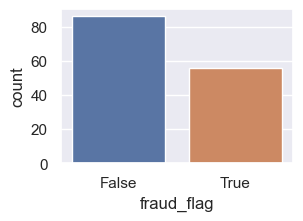

In [174]:
sns.set(rc={'figure.figsize':(3,2)})
sns.countplot(data=df_cust, x='fraud_flag')

### Total number of fraud transaction are 56, while Non fraud transaction are 86

<AxesSubplot:xlabel='transactions_count', ylabel='count'>

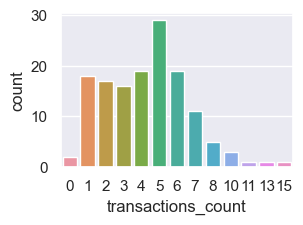

In [175]:
## Checking the distribution of data for customer table

sns.countplot(data=df_cust, x='transactions_count')

#### Maximum numbers of customer do 5 transaction. 

<AxesSubplot:xlabel='orders_count', ylabel='count'>

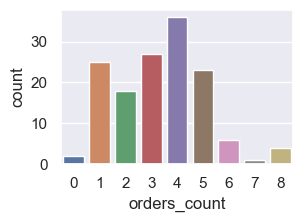

In [176]:
sns.countplot(data=df_cust, x='orders_count')

#### Maximum frequency of orders for customer is 4


<AxesSubplot:xlabel='fraud_flag', ylabel='fraud_score'>

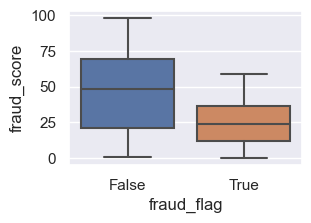

In [177]:
sns.boxplot(x=df_cust.fraud_flag, y=df_cust.fraud_score )

#### 1) The fraud score varies for customer between  0 and  60 for fraud cases. The, mean is 25 and IQR range between 10 to 38.
#### 2) The fraud score varies for customer between  0 and  100 for non-fraud cases.  The, mean is 52 and IQR range between 23 and  70.

<AxesSubplot:xlabel='fraud_flag', ylabel='transactions_count'>

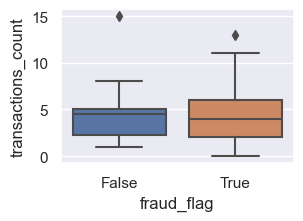

In [178]:
sns.boxplot(x=df_cust.fraud_flag, y=df_cust.transactions_count )

#### 1) The transaction count varies for customer between  0 and  11 for fraud cases. The, mean is 4 and IQR range between 2 to 6. There is a outlier with 13 transaction count. 
#### 2) The transaction count varies for customer between  1 and  8 for non-fraud cases.  The, mean is 4.5 and IQR range between 2.2 and  5.There is a outlier with 15 transaction count. 

<AxesSubplot:xlabel='fraud_flag', ylabel='orders_count'>

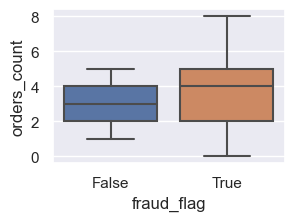

In [179]:
sns.boxplot(x=df_cust.fraud_flag, y=df_cust.orders_count )

#### 1) The order count varies for customer between  0 and  8 for fraud cases. The, mean is 4 and IQR range between 2 to 5. 
#### 2) The order count varies for customer between  1 and  5 for non-fraud cases.  The, mean is 3 and IQR range between 2 and  4.

### Checking the email address occurence in customer table, will give insight in duplicate names

In [180]:
pd.DataFrame(pd.DataFrame(df_cust.customer_email, columns=['customer_email']).groupby('customer_email')['customer_email'].count()).rename(columns={'customer_email': 'Counts'}).sort_values(by='Counts', ascending=False)

,Counts
customer_email,
johnlowery@gmail.com,8
nolanalec@yahoo.com,1
mitchellvickie@brewer-jones.com,1
mtrevino@gutierrez.net,1
mullenstephanie@yahoo.com,1
...,...
deborah38@yahoo.com,1
dawn05@tucker-brown.com,1
davismike@hotmail.com,1


#### As we can see that one email address "johnlowery@gmail.com" is ocurring more than once in the customer table, we need to check the occurence of fraud for this customer.

In [181]:
df_cust[['customer_email', 'fraud_flag']][df_cust['customer_email']=='johnlowery@gmail.com']

,customer_email,fraud_flag
7,johnlowery@gmail.com,True
40,johnlowery@gmail.com,True
45,johnlowery@gmail.com,True
65,johnlowery@gmail.com,True
79,johnlowery@gmail.com,True
133,johnlowery@gmail.com,True
155,johnlowery@gmail.com,True
165,johnlowery@gmail.com,True


#### This customer has all of the transaction as fraudelent.  

#### Also we can check for the difference in various unique identification columns for customer such as 'customer_email', 'customer_phone', 'customer_device', 'customer_ip_address', 'customer_billing_address'.

#### We can conclude this customer "johnlowery@gmail.com" has different phone number, devices, ip address, billing addresses.

In [182]:
df_cust[['customer_email', 'customer_phone', 'customer_device', 'customer_ip_address', 'customer_billing_address','fraud_flag']][df_cust['customer_email']=='johnlowery@gmail.com']

,customer_email,customer_phone,customer_device,customer_ip_address,customer_billing_address,fraud_flag
7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",True
40,johnlowery@gmail.com,737-377-9701x577,jz66ap43id2y35ivfqa5,6c21:ac1d:2089:68fa:abb7:8c00:525f:6588,"08238 Kyle Squares Suite 893\nMillermouth, IN ...",True
45,johnlowery@gmail.com,+16(4)9016414340,cdx178qymd6vy77nm4x3,222.79.159.140,"77711 Pamela Ridge\nNew Kayla, IL 27182",True
65,johnlowery@gmail.com,4712252182,311kdz4c1210iixltk2j,42b3:df19:86fe:abd9:dafe:f6c1:eb76:c72,"11704 Andrew Villages Apt. 035\nJamesfurt, OR ...",True
79,johnlowery@gmail.com,1-820-539-4726x993,2in0fh7lep289n8dcbdz,163.128.139.42,"814 Wagner Union\nAshleymouth, HI 35617",True
133,johnlowery@gmail.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",True
155,johnlowery@gmail.com,076-099-0630x72770,6qy6oa3nqutsyyxzc54c,f259:657f:f329:2fca:c06c:8b57:d6ac:2380,"687 Rogers Bridge Suite 780\nValdezburgh, IN 2...",True
165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",True


In [183]:
df_cust[['customer_email', 'customer_phone', 'customer_device', 'customer_ip_address', 'customer_billing_address','fraud_flag']][df_cust['customer_email']=='johnlowery@gmail.com'].nunique()

customer_email              1
customer_phone              8
customer_device             8
customer_ip_address         8
customer_billing_address    8
fraud_flag                  1
dtype: int64

#### Therefore, we can say that this  customer "johnlowery@gmail.com" has different record of personal identification such as phone number, device, ip address and billing address.

#### we can check the duplicate entries for other customer also. 

In [184]:
df_cust[df_cust.customer_email != 'johnlowery@gmail.com'].nunique()

customer_email              134
customer_phone              134
customer_device             134
customer_ip_address         131
customer_billing_address    132
transactions_count           12
orders_count                  8
payments_count               10
fraud_flag                    2
fraud_type                    3
fraud_score                  75
dtype: int64

#### This is a different thing that we notice, if all are email address are unique so should the corresponding unique identification columns of customer_ip_address, customer_billing_address. But clealry we can say that some of the customer are sharing ip address and billing address.

#### We need to dive further in the customer data table to check this unequal record.

In [185]:
pd.DataFrame(df_cust[['customer_email', 'customer_ip_address']][df_cust.customer_email != 'johnlowery@gmail.com'].groupby(['customer_ip_address'])['customer_email'].count()).rename(columns={'customer_email': 'Counts'}).sort_values(by='Counts', ascending=False)

,Counts
customer_ip_address,
45.203.99.249,4
101.94.37.245,1
72.251.102.162,1
87.18.25.113,1
86.201.239.98,1
...,...
219.173.211.202,1
203.246.172.244,1
202.230.239.182,1


#### We can check the details of the customer that have this ip address, 45.203.99.249

In [186]:
df_cust[df_cust.customer_ip_address=='45.203.99.249']

,customer_email,customer_phone,customer_device,customer_ip_address,customer_billing_address,transactions_count,orders_count,payments_count,fraud_flag,fraud_type,fraud_score
46,jamescampbell@randall-pacheco.biz,599-142-6783,eaul63h9guyvwuymfn3z,45.203.99.249,"29408 Lisa Lock\nPort Jennifer, LA 26501-7040",7,3,2,True,type_1,27
80,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,4,4,14,True,type_1,41
88,shelby24@hotmail.com,(071)934-3315x27613,obb41ux0zfa2td5ajo9s,45.203.99.249,"3271 Cynthia Groves\nPort Jeremyberg, CO 27305",5,4,2,True,type_2,33
141,christinemills@mcgee.com,(651)355-4709,zbn9it3s7yl69bjtrnqf,45.203.99.249,"5156 Greene Park Apt. 748\nNew Sandra, CA 1480...",5,5,2,True,type_1,57


In [187]:
pd.DataFrame(df_cust[['customer_email', 'customer_billing_address']][df_cust.customer_email != 'johnlowery@gmail.com'].groupby(['customer_billing_address'])['customer_email'].count()).rename(columns={'customer_email': 'Counts'}).sort_values(by='Counts', ascending=False)

,Counts
customer_billing_address,
"49680 Brian Squares Apt. 122\nPort Walterburgh, MH 02766-0708",3
"0008 Jessica Stream\nMcbridetown, MH 04017",1
"7835 Jasmine Mission Suite 502\nPort Alejandra, WA 47942-2517",1
"73802 Aaron Field Apt. 622\nPort Lisa, MO 01167",1
"7444 Shelby Fords Apt. 290\nRhondaland, AS 85277-9573",1
...,...
"357 Barbara Crossroad\nJacobsburgh, WY 09289-9170",1
"356 Elizabeth Inlet Suite 120\nPort Joshuabury, NM 37681",1
"34958 Sean View\nWest Robert, DE 93344-9833",1


#### We can check the details of the customer that have this billing address, 49680 Brian Squares Apt. 122\nPort Walterburgh, MH 02766-0708

In [188]:
df_cust[df_cust.customer_billing_address=='49680 Brian Squares Apt. 122\nPort Walterburgh, MH 02766-0708']

,customer_email,customer_phone,customer_device,customer_ip_address,customer_billing_address,transactions_count,orders_count,payments_count,fraud_flag,fraud_type,fraud_score
57,feliciabrown@gmail.com,(226)129-2677,z7xkuohhjbtiqs6q9rk9,115.137.171.103,49680 Brian Squares Apt. 122\nPort Walterburgh...,1,1,1,True,type_1,34
80,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,4,4,14,True,type_1,41
90,brittanydean@hotmail.com,6238721842,yq8xiivmx4prlgx0gofo,3517:8e52:885:8640:a59:f5fd:cb33:b06a,49680 Brian Squares Apt. 122\nPort Walterburgh...,6,4,1,True,type_2,23


### A important insight is that customer who have same ip address and billing address have comiiteed fraud !!

## => Combining the two tables for better insight

#### The transaction table contains a some key insight 

#### Since customer "johnlowery@gmail.com" has 8 records we will just include one record and drop remaining 7 for ease of joining the tables. 
#### Also, the other point we need to consider is that around 26 customer are not present in the transaction table table while they are present in customer table. This customer will need to be dropped for any insight generation.

In [189]:
a=df_cust[df_cust.customer_email != 'johnlowery@gmail.com']
b=pd.DataFrame(df_cust[df_cust.customer_email == 'johnlowery@gmail.com'].loc[7]).transpose()
df_cust_temp=pd.concat([a,b])
df_cust_temp

,customer_email,customer_phone,customer_device,customer_ip_address,customer_billing_address,transactions_count,orders_count,payments_count,fraud_flag,fraud_type,fraud_score
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,type_1,37
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,Not Fraud,50
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,Not Fraud,87
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,type_1,4
5,robinsoncynthia@dunn.com,+65(5)8997489788,hbww39m1wenbq4ymjhsx,43.166.163.164,"65233 Hutchinson Mountains\nMartinezside, OR 7...",1,1,2,True,type_1,22
...,...,...,...,...,...,...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True,type_1,44
164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True,type_1,11
166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,True,type_1,49
167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,Not Fraud,91


In [190]:
df_fraud_type_flag=df_cust_temp

In [191]:
df_main=df_transact.merge(df_cust_temp,how='inner',on='customer_email')
df_main

,customer_email,transaction_id,order_id,payment_method_id,payment_method_registration_failure,payment_method_type,payment_method_provider,transaction_amount,transaction_failed,order_state,customer_phone,customer_device,customer_ip_address,customer_billing_address,transactions_count,orders_count,payments_count,fraud_flag,fraud_type,fraud_score
0,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,type_1,37
1,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,type_1,37
2,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,type_1,37
3,andersonwilliam@yahoo.com,q3lyvbza,yk34y2,8pneoi03z,0,card,JCB 16 digit,33,0,failed,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,Not Fraud,50
4,andersonwilliam@yahoo.com,3alf9irw,28v6b0,8pneoi03z,0,card,JCB 16 digit,24,1,fulfilled,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,Not Fraud,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,dawn05@tucker-brown.com,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,1,fulfilled,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,Not Fraud,91
616,dawn05@tucker-brown.com,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,0,fulfilled,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,Not Fraud,91
617,dawn05@tucker-brown.com,wmh52bns,1bubxa,3zmkegkb8,0,paypal,JCB 15 digit,25,1,fulfilled,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,Not Fraud,91
618,dawn05@tucker-brown.com,xdw33hfp,p0gdbf,3zmkegkb8,0,paypal,JCB 15 digit,19,0,fulfilled,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,Not Fraud,91


### => This EDA below is just to check the customer pattern and will not be used to make any judgement. Its just helps to know charatertics of customer who are fraudelent. But, as a customer may have multiple transaction and one of the transaction might be fraudelent therefore we cannot infer anything strongly from the EDA below.

### We can check the payment method type and payment method provider for fraud & non-fraud cases.

<AxesSubplot:xlabel='payment_method_provider', ylabel='count'>

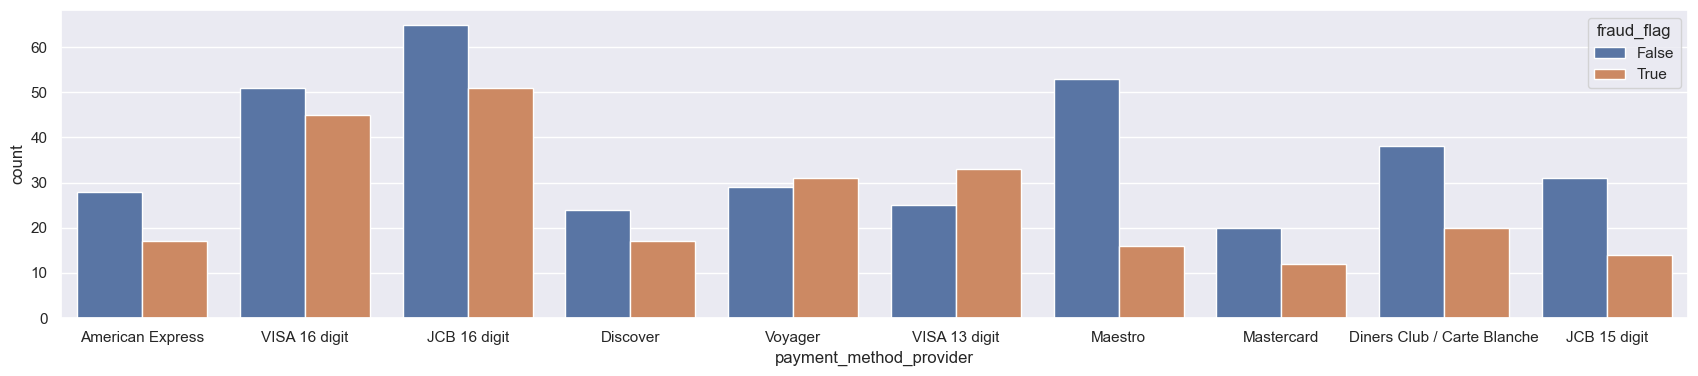

In [192]:
data=df_main[['payment_method_provider', 'payment_method_type', 'fraud_flag' ]]
sns.set(rc={'figure.figsize':(21,4)})

sns.countplot(data=data, x=data['payment_method_provider'] , hue='fraud_flag')

### The distribution data shows that most fraduelent activities are found in payment method JCB 16 digit and VISA 16 digit. While least are found in payment method "mastercard".

<AxesSubplot:xlabel='payment_method_type', ylabel='count'>

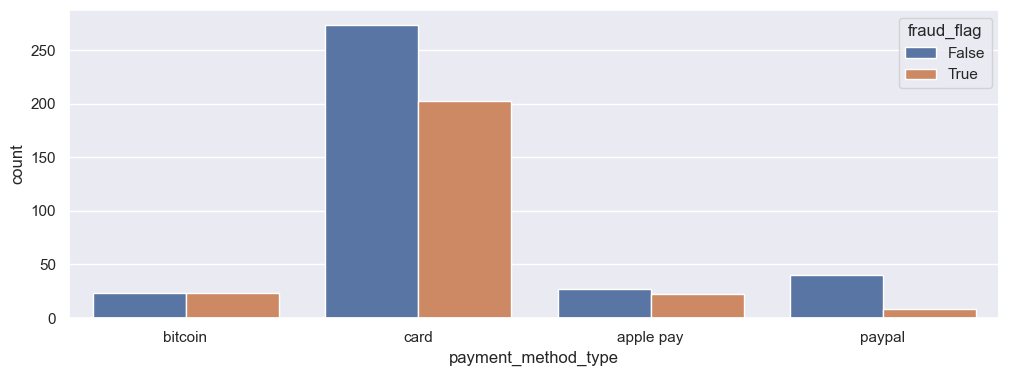

In [193]:
sns.set(rc={'figure.figsize':(12,4)})

sns.countplot(data=data, x=data['payment_method_type'] , hue='fraud_flag')

### The distribution data shows that most fraduelent activities are found in card payment method while least is found in paypal.

### One of the key insight can be for what transaction amount is the mostly found in fruadlent cases.

In [194]:
df_fraud_bin=df_main[['transaction_amount','fraud_flag']].sort_values(by='transaction_amount', ascending=False)
df_fraud_bin['bins'] = pd.cut(x=df_fraud_bin['transaction_amount'], bins=[-1, 20, 40, 60, 80, 100,500,1000000], labels=['0 to 20', '21 to 40', '41 to 60',
                            '61 to 80', '81 to 100', '100 to 500', "+500"])
df_fraud_bin

,transaction_amount,fraud_flag,bins
455,1000000,False,+500
205,353,True,100 to 500
306,75,True,61 to 80
136,75,True,61 to 80
436,74,True,61 to 80
...,...,...,...
66,10,False,0 to 20
158,10,False,0 to 20
408,10,False,0 to 20
407,10,False,0 to 20


<AxesSubplot:xlabel='bins', ylabel='count'>

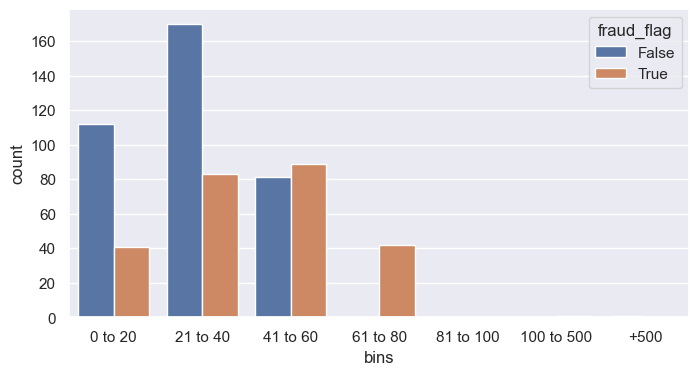

In [195]:
sns.set(rc={'figure.figsize':(8,4)})

sns.countplot(data=df_fraud_bin, x=df_fraud_bin['bins'] , hue='fraud_flag')

### We can see that most fraud activities have happened in the transaction amount between 60 to 80.

### A key insight can be were all fraudelent transactio successfull.

## 3) a. Calculating the number of total successful transaction amount by each customer from customer table

In [196]:
df_transact[df_transact['transaction_failed']==0][['customer_email','transaction_amount']].groupby('customer_email').sum().sort_values(by='transaction_amount', ascending=False)

,transaction_amount
customer_email,
gomezjohn@yahoo.com,1000016
johnlowery@gmail.com,763
lleonard@turner-fleming.com,471
david45@gmail.com,395
vmiller@hotmail.com,373
...,...
JOSEPHHOWARD@YAHOO.COM,18
brooksdustin@knight.info,17
daniel98@lamb.com,16


## 3) b. Calculating the number of "Good Customers" from transaction table

### The list of good customers :-

In [197]:
print((df_transact[df_transact['transaction_failed']==0]['customer_email']).unique())

['JOSEPHHOWARD@YAHOO.COM' 'joseph.howard@yahoo.com'
 'evansjeffery@yahoo.com' 'andersonwilliam@yahoo.com'
 'rubenjuarez@yahoo.com' 'uchen@malone.com' 'robinsoncynthia@dunn.com'
 'samuel15@saunders-rhodes.com' 'johnlowery@gmail.com'
 'j.o.h.n.l.o.w.e.r.y@gmail.com' 'jameslandry@rodriguez.com'
 'bowenwilliam@yahoo.com' 'ksummers@hotmail.com'
 'christineklein@wright-boyd.org' 'meganwalters@chavez.com'
 'caleb94@sutton.info' 'gonzalesjackson@gmail.com' 'dana09@yahoo.com'
 'alec27@bell.com' 'juliecook@hotmail.com' 'meganberry@clark.biz'
 'psantiago@nelson.net' 'harrisnicholas@mitchell-hancock.com'
 'davismike@hotmail.com' 'natalie98@yahoo.com' 'karen54@mullins.biz'
 'avaldez@gmail.com' 'blackjoel@wright.com' 'abigail08@yahoo.com'
 'catherine64@gmail.com' 'romerolauren@hotmail.com' 'qramsey@hotmail.com'
 '9es7t@u6n7x' 'ypruitt@hotmail.com' 'aweaver@yahoo.com'
 'richard05@hanson-key.org' 'paul86@hotmail.com' 'mark02@young.com'
 'brandon58@conner.com' 'jamescampbell@randall-pacheco.biz'
 'bria

## 4) Calculating the current Fraud Rate for the company 

### Fraud Rate

In [198]:
a=len(df_cust[df_cust["fraud_flag"]==True])
b=len(df_cust["fraud_flag"])

c=round(a/b*100,2)
c

39.44

### Fraud rate of our model is 39.44% that is less than industry standard of 50 %. Therefore it is clear our model is not up to the mark.
### We, can check whether our our model scoring mechanism is inline with fraud rate. 

In [199]:
df_bin=df_cust[['fraud_flag','fraud_score']].sort_values(by='fraud_score', ascending=False)
df_bin['bins'] = pd.cut(x=df_bin['fraud_score'], bins=[-1, 20, 40, 60, 80, 100], labels=['0 to 20', '21 to 40', '41 to 60',
                            '61 to 80', '81 to 100'])
df_bin

,fraud_flag,fraud_score,bins
14,False,98,81 to 100
95,False,98,81 to 100
109,False,94,81 to 100
36,False,94,81 to 100
75,False,93,81 to 100
...,...,...,...
71,False,1,0 to 20
63,False,1,0 to 20
77,False,1,0 to 20
56,False,1,0 to 20


<AxesSubplot:xlabel='bins', ylabel='count'>

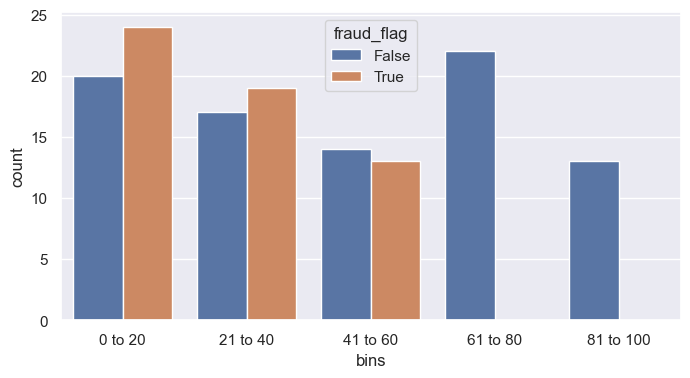

In [200]:
sns.set(rc={'figure.figsize':(8,4)})

sns.countplot(data=df_bin, x=df_bin['bins'] , hue='fraud_flag')

### It is clear from above observation higher fraud score is not necessarily equivalent to more fraud cases. This means the scoring model does not actually work for our company. On contarary, we can say that if the fraud score is less 60 then there is a higher chance of customer doing fraudelent activities. Also, It is evident from the data that if a customer scored less than 20 then there is a great chance of having a fraud case.

# 5) Feature Engineering

 ## Performing Feature engineering on transaction table data

In [201]:
## Droping the unwanted columns

df_feature=df_transact.drop(columns=['transaction_id','order_id','payment_method_id'])
df_feature

,customer_email,payment_method_registration_failure,payment_method_type,payment_method_provider,transaction_amount,transaction_failed,order_state
0,JOSEPHHOWARD@YAHOO.COM,1,card,JCB 16 digit,18,0,pending
1,joseph.howard@yahoo.com,1,card,JCB 16 digit,26,0,fulfilled
2,evansjeffery@yahoo.com,0,bitcoin,American Express,45,0,fulfilled
3,evansjeffery@yahoo.com,0,bitcoin,American Express,23,0,fulfilled
4,evansjeffery@yahoo.com,1,bitcoin,VISA 16 digit,43,1,fulfilled
...,...,...,...,...,...,...,...
618,dawn05@tucker-brown.com,0,card,VISA 13 digit,25,1,fulfilled
619,dawn05@tucker-brown.com,0,card,VISA 13 digit,25,0,fulfilled
620,dawn05@tucker-brown.com,0,paypal,JCB 15 digit,25,1,fulfilled
621,dawn05@tucker-brown.com,0,paypal,JCB 15 digit,19,0,fulfilled


### a) Working on payment_method_registration_failure column for creating two columns (True/ False) with counts of values for each email address.

In [202]:
email_list=list(df_feature['customer_email'].unique())
email_df=pd.DataFrame(email_list)

In [203]:
df_payment_method_registration_failure=pd.DataFrame()
for i in email_list:
    df_payment_method_registration_failure=pd.concat([df_payment_method_registration_failure,pd.DataFrame((df_feature[df_feature['customer_email']==i]['payment_method_registration_failure'].value_counts())).transpose().reset_index(drop=True)]).fillna(0)

In [204]:
df_payment_method_registration_failure=df_payment_method_registration_failure.rename(columns={1: 'payment_method_registration_failure_1',0: 'payment_method_registration_failure_0'}).reset_index()

In [205]:
df_feat_new=pd.concat([email_df,df_payment_method_registration_failure], axis=1).drop(columns=['index'])
df_feat_new

,0,payment_method_registration_failure_1,payment_method_registration_failure_0
0,JOSEPHHOWARD@YAHOO.COM,1.0,0.0
1,joseph.howard@yahoo.com,1.0,0.0
2,evansjeffery@yahoo.com,1.0,2.0
3,andersonwilliam@yahoo.com,0.0,5.0
4,rubenjuarez@yahoo.com,0.0,3.0
...,...,...,...
133,patrickcalderon@russo.net,0.0,3.0
134,mitchellvickie@brewer-jones.com,0.0,3.0
135,sbrown@hughes.biz,0.0,6.0
136,ethompson@jackson-sanders.com,0.0,8.0


### b) Working on payment_method_type column for creating four columns (card, bitcoin, apple pay, paypal) with counts of values for each email address.

In [206]:
df_payment_method_type=pd.DataFrame()
for i in email_list:
    df_payment_method_type=pd.concat([df_payment_method_type,pd.DataFrame((df_feature[df_feature['customer_email']==i]['payment_method_type'].value_counts())).transpose().reset_index(drop=True)]).fillna(0)
df_payment_method_type=df_payment_method_type.reset_index()

In [207]:
df_payment_method_type

,index,card,bitcoin,apple pay,paypal
0,0,1.0,0.0,0.0,0.0
1,0,1.0,0.0,0.0,0.0
2,0,0.0,3.0,0.0,0.0
3,0,5.0,0.0,0.0,0.0
4,0,3.0,0.0,0.0,0.0
...,...,...,...,...,...
133,0,0.0,0.0,3.0,0.0
134,0,3.0,0.0,0.0,0.0
135,0,6.0,0.0,0.0,0.0
136,0,6.0,2.0,0.0,0.0


In [208]:
df_feat_new=pd.concat([df_feat_new,df_payment_method_type], axis=1).drop(columns=['index'])
df_feat_new

,0,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal
0,JOSEPHHOWARD@YAHOO.COM,1.0,0.0,1.0,0.0,0.0,0.0
1,joseph.howard@yahoo.com,1.0,0.0,1.0,0.0,0.0,0.0
2,evansjeffery@yahoo.com,1.0,2.0,0.0,3.0,0.0,0.0
3,andersonwilliam@yahoo.com,0.0,5.0,5.0,0.0,0.0,0.0
4,rubenjuarez@yahoo.com,0.0,3.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
133,patrickcalderon@russo.net,0.0,3.0,0.0,0.0,3.0,0.0
134,mitchellvickie@brewer-jones.com,0.0,3.0,3.0,0.0,0.0,0.0
135,sbrown@hughes.biz,0.0,6.0,6.0,0.0,0.0,0.0
136,ethompson@jackson-sanders.com,0.0,8.0,6.0,2.0,0.0,0.0


### c) Working on payment_method_type column for creating ten columns (JCB 16 digit, American Express, VISA 16 digit, Discover ,Voyager, VISA 13 digit, Maestro, Mastercard, Diners Club / Carte Blanche , JCB 15 digit) with counts of values for each email address.

In [209]:
df_payment_method_provider=pd.DataFrame()
for i in email_list:
    df_payment_method_provider=pd.concat([df_payment_method_provider,pd.DataFrame((df_feature[df_feature['customer_email']==i]['payment_method_provider'].value_counts())).transpose().reset_index(drop=True)]).fillna(0)
df_payment_method_provider=df_payment_method_provider.reset_index()

In [210]:
df_payment_method_provider

,index,JCB 16 digit,American Express,VISA 16 digit,Discover,Voyager,VISA 13 digit,Maestro,Mastercard,Diners Club / Carte Blanche,JCB 15 digit
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
133,0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0
136,0,2.0,2.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0


In [211]:
df_feat_new=pd.concat([df_feat_new,df_payment_method_provider], axis=1).drop(columns=['index'])
df_feat_new

,0,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal,JCB 16 digit,American Express,VISA 16 digit,Discover,Voyager,VISA 13 digit,Maestro,Mastercard,Diners Club / Carte Blanche,JCB 15 digit
0,JOSEPHHOWARD@YAHOO.COM,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,joseph.howard@yahoo.com,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,evansjeffery@yahoo.com,1.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,andersonwilliam@yahoo.com,0.0,5.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,rubenjuarez@yahoo.com,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,patrickcalderon@russo.net,0.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,mitchellvickie@brewer-jones.com,0.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,sbrown@hughes.biz,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0
136,ethompson@jackson-sanders.com,0.0,8.0,6.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0


### d) Working on transaction_failed column for creating two columns (True/ False) with counts of values for each email address.

In [212]:
df_transaction_failed=pd.DataFrame()
for i in email_list:
    df_transaction_failed=pd.concat([df_transaction_failed,pd.DataFrame((df_feature[df_feature['customer_email']==i]['transaction_failed'].value_counts())).transpose().reset_index(drop=True)]).fillna(0)
df_transaction_failed=df_transaction_failed.reset_index()

In [213]:
df_transaction_failed=df_transaction_failed.rename(columns={1: 'transaction_failed_1',0: 'transaction_failed_0'}).reset_index()

In [214]:
df_feat_new=pd.concat([df_feat_new,df_transaction_failed], axis=1)
df_feat_new

,0,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal,JCB 16 digit,American Express,VISA 16 digit,...,Voyager,VISA 13 digit,Maestro,Mastercard,Diners Club / Carte Blanche,JCB 15 digit,level_0,index,transaction_failed_0,transaction_failed_1
0,JOSEPHHOWARD@YAHOO.COM,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0
1,joseph.howard@yahoo.com,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1.0,0.0
2,evansjeffery@yahoo.com,1.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0,2.0,1.0
3,andersonwilliam@yahoo.com,0.0,5.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,0,3.0,2.0
4,rubenjuarez@yahoo.com,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,4,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,patrickcalderon@russo.net,0.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,133,0,2.0,1.0
134,mitchellvickie@brewer-jones.com,0.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,134,0,3.0,0.0
135,sbrown@hughes.biz,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,135,0,5.0,1.0
136,ethompson@jackson-sanders.com,0.0,8.0,6.0,2.0,0.0,0.0,2.0,2.0,0.0,...,3.0,0.0,1.0,0.0,0.0,0.0,136,0,6.0,2.0


In [215]:
df_feat_new=df_feat_new.drop(columns=['level_0','index'])

In [216]:
df_feat_new=df_feat_new.rename(columns={0: 'customer_email'})

In [217]:
df_feat_new

,customer_email,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal,JCB 16 digit,American Express,VISA 16 digit,Discover,Voyager,VISA 13 digit,Maestro,Mastercard,Diners Club / Carte Blanche,JCB 15 digit,transaction_failed_0,transaction_failed_1
0,JOSEPHHOWARD@YAHOO.COM,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,joseph.howard@yahoo.com,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,evansjeffery@yahoo.com,1.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
3,andersonwilliam@yahoo.com,0.0,5.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
4,rubenjuarez@yahoo.com,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,patrickcalderon@russo.net,0.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
134,mitchellvickie@brewer-jones.com,0.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
135,sbrown@hughes.biz,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0
136,ethompson@jackson-sanders.com,0.0,8.0,6.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,6.0,2.0


### e) Working on order_state column for creating four columns (pending, fulfilled, failed) with counts of values for each email address.

In [218]:
df_order_state=pd.DataFrame()
for i in email_list:
    df_order_state=pd.concat([df_order_state,pd.DataFrame((df_feature[df_feature['customer_email']==i]['order_state'].value_counts())).transpose().reset_index(drop=True)]).fillna(0)
df_order_state=df_order_state.reset_index()

In [219]:
df_feat_new=pd.concat([df_feat_new,df_order_state], axis=1).drop(columns=['index'])
df_feat_new

,customer_email,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal,JCB 16 digit,American Express,VISA 16 digit,...,VISA 13 digit,Maestro,Mastercard,Diners Club / Carte Blanche,JCB 15 digit,transaction_failed_0,transaction_failed_1,pending,fulfilled,failed
0,JOSEPHHOWARD@YAHOO.COM,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,joseph.howard@yahoo.com,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,evansjeffery@yahoo.com,1.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,0.0
3,andersonwilliam@yahoo.com,0.0,5.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,4.0,1.0
4,rubenjuarez@yahoo.com,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,patrickcalderon@russo.net,0.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,0.0
134,mitchellvickie@brewer-jones.com,0.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0
135,sbrown@hughes.biz,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,6.0,0.0
136,ethompson@jackson-sanders.com,0.0,8.0,6.0,2.0,0.0,0.0,2.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,6.0,2.0,0.0,7.0,1.0


In [220]:
df_features=df_feat_new

### f) Working on transaction_amount column for creating a column with sum of transaction amount for each email address.

In [221]:
df_transaction_amount=pd.DataFrame(df_transact.groupby('customer_email')['transaction_amount'].sum())
df_transaction_amount=df_transaction_amount.rename(columns={'transaction_amount': 'amount'})

In [222]:
df_transaction_amount

,amount
customer_email,
1yf0@jedyz63t,217
9es7t@u6n7x,32
JOSEPHHOWARD@YAHOO.COM,18
abigail08@yahoo.com,209
alec27@bell.com,158
...,...
wdelacruz@yahoo.com,231
whitedavid@jones-lloyd.org,283
ybrown@gmail.com,144


In [223]:
df_feat_new=df_feat_new.set_index('customer_email')

In [224]:
df_feat_new=df_transaction_amount.merge(df_feat_new,on='customer_email', how='inner')

### Final transaction table converted by fetaure engineering:- 

In [225]:
df_feat_new

,amount,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal,JCB 16 digit,American Express,VISA 16 digit,...,VISA 13 digit,Maestro,Mastercard,Diners Club / Carte Blanche,JCB 15 digit,transaction_failed_0,transaction_failed_1,pending,fulfilled,failed
customer_email,,,,,,,,,,,,,,,,,,,,,
1yf0@jedyz63t,217,0.0,10.0,7.0,0.0,0.0,3.0,0.0,0.0,0.0,...,6.0,1.0,3.0,0.0,0.0,5.0,5.0,0.0,10.0,0.0
9es7t@u6n7x,32,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0
JOSEPHHOWARD@YAHOO.COM,18,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
abigail08@yahoo.com,209,1.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,1.0,0.0,0.0,0.0,3.0,2.0,2.0,1.0,2.0
alec27@bell.com,158,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wdelacruz@yahoo.com,231,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,2.0,2.0
whitedavid@jones-lloyd.org,283,3.0,2.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,1.0
ybrown@gmail.com,144,0.0,5.0,5.0,0.0,0.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,4.0,1.0


### We can run a Anamoly Detection Algorithm on this Dataset and check for anamolies

In [226]:
df_cust_temp=df_cust_temp[['customer_email', 'transactions_count',
       'orders_count', 'payments_count', 'fraud_flag']]

In [227]:
df_cust=df_cust_temp.set_index('customer_email')

In [228]:
df_train=df_feat_new.merge(df_cust, on='customer_email', how='inner')

In [229]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 1yf0@jedyz63t to zgraham@yahoo.com
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   amount                                 135 non-null    int64  
 1   payment_method_registration_failure_1  135 non-null    float64
 2   payment_method_registration_failure_0  135 non-null    float64
 3   card                                   135 non-null    float64
 4   bitcoin                                135 non-null    float64
 5   apple pay                              135 non-null    float64
 6   paypal                                 135 non-null    float64
 7   JCB 16 digit                           135 non-null    float64
 8   American Express                       135 non-null    float64
 9   VISA 16 digit                          135 non-null    float64
 10  Discover                               135 non-null  

#### Changing the data type for the transactions_count , orders_count  , payments_countfrom object to int64

In [230]:
df_train['transactions_count']=df_train['transactions_count'].astype('int64')
df_train['orders_count']=df_train['orders_count'].astype('int64')
df_train['payments_count']=df_train['payments_count'].astype('int64')

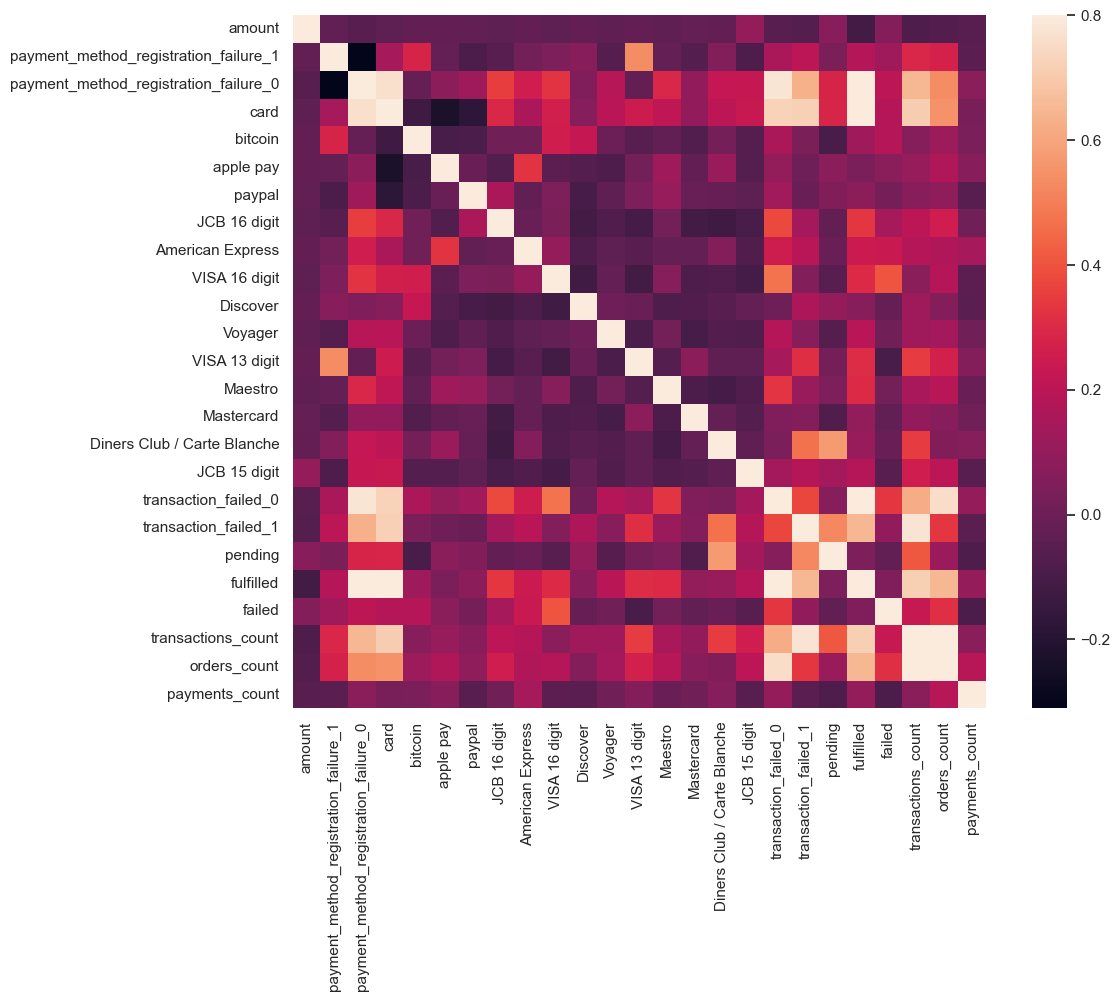

In [231]:
#Correlation Matrix

correlation_matrix = df_train.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

### Most of the feature are uncorrelated and can be used in modelling without any further changes

In [232]:
# Cheking the shape of data

df_train.shape

(135, 26)

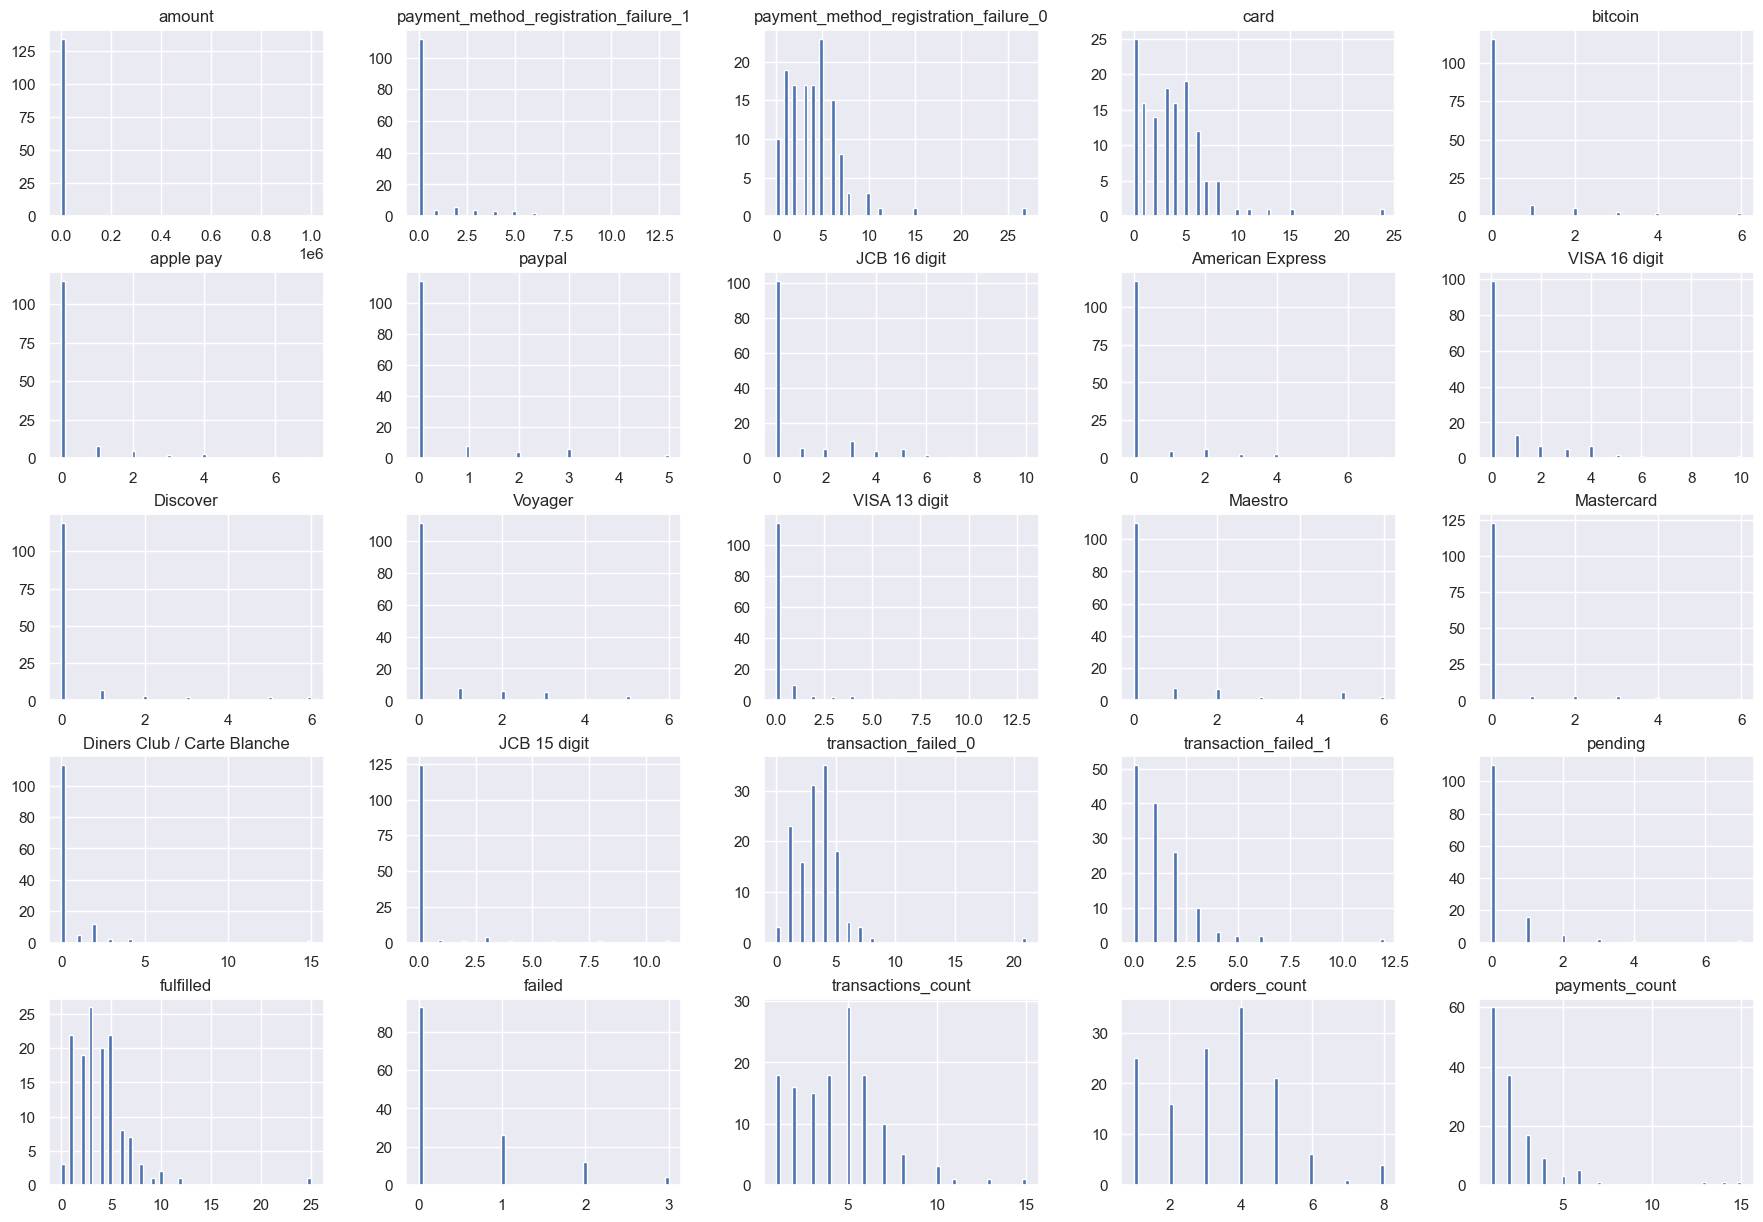

In [233]:
# Checking the distribution of the  data

df_train.hist(figsize=(22,15), bins = 64)
plt.show()

### Most of the Data is right skewed.

## Anamoly Detection using unsupervised learning on transaction table. Will help us to gauge if the engineered feature will perform good for any classification model.

### We will run a unsupervised anamoly detection Algorithm on the transaction dataset, and compare the result with the fraud flag. This will help us to understand if the features from transaction dataset are working inline with the fraud flags.

In [234]:
df_transact_anamoly=df_train.drop(columns=['transactions_count','orders_count','payments_count'])
df_transact_anamoly

,amount,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal,JCB 16 digit,American Express,VISA 16 digit,...,Maestro,Mastercard,Diners Club / Carte Blanche,JCB 15 digit,transaction_failed_0,transaction_failed_1,pending,fulfilled,failed,fraud_flag
customer_email,,,,,,,,,,,,,,,,,,,,,
1yf0@jedyz63t,217,0.0,10.0,7.0,0.0,0.0,3.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,5.0,5.0,0.0,10.0,0.0,True
9es7t@u6n7x,32,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,True
abigail08@yahoo.com,209,1.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,...,1.0,0.0,0.0,0.0,3.0,2.0,2.0,1.0,2.0,False
alec27@bell.com,158,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,4.0,2.0,1.0,5.0,0.0,False
aliciaanthony@martin.com,95,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wdelacruz@yahoo.com,231,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,1.0,0.0,2.0,2.0,True
whitedavid@jones-lloyd.org,283,3.0,2.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,1.0,True
ybrown@gmail.com,144,0.0,5.0,5.0,0.0,0.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,4.0,1.0,0.0,4.0,1.0,False


In [235]:
df_transact_anamoly_x=df_transact_anamoly.drop(columns=['fraud_flag'])
df_transact_anamoly_y=df_transact_anamoly.iloc[:,-1]

In [236]:
# Calculate PCA with 2 components
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_transact_anamoly_x)
principal_df= pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [237]:
df_transact_anamoly_x=df_transact_anamoly_x.reset_index()
df_transact_anamoly_x=pd.concat([df_transact_anamoly_x,principal_df], axis=1)
df_transact_anamoly_x=df_transact_anamoly_x.set_index('customer_email')
df_transact_anamoly_x

,amount,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal,JCB 16 digit,American Express,VISA 16 digit,...,Mastercard,Diners Club / Carte Blanche,JCB 15 digit,transaction_failed_0,transaction_failed_1,pending,fulfilled,failed,pc1,pc2
customer_email,,,,,,,,,,,,,,,,,,,,,
1yf0@jedyz63t,217,0.0,10.0,7.0,0.0,0.0,3.0,0.0,0.0,0.0,...,3.0,0.0,0.0,5.0,5.0,0.0,10.0,0.0,-7349.163013,9.364613
9es7t@u6n7x,32,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,-7534.162945,-3.897620
abigail08@yahoo.com,209,1.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,3.0,2.0,2.0,1.0,2.0,-7357.162954,-0.292715
alec27@bell.com,158,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,4.0,2.0,1.0,5.0,0.0,-7408.162977,3.351973
aliciaanthony@martin.com,95,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,-7471.162955,-1.739402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wdelacruz@yahoo.com,231,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,3.0,1.0,0.0,2.0,2.0,-7335.162956,-0.622325
whitedavid@jones-lloyd.org,283,3.0,2.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,4.0,1.0,-7283.162966,0.412410
ybrown@gmail.com,144,0.0,5.0,5.0,0.0,0.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,4.0,1.0,0.0,4.0,1.0,-7422.162969,1.731315


## Using IQR range to check anamolies

In [238]:
def pca_IQR(df_transact_anamoly_x ,pc1):
    q1_pc1, q3_pc1 = df_transact_anamoly_x[pc1].quantile([0.25, 0.75])
    iqr_pc1 = q3_pc1 - q1_pc1
    # Calculate upper and lower bounds for outlier for pc1
    lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
    upper_pc1 = q3_pc1 + (1.5*iqr_pc1)
    # Filter out the outliers from the pc1
    df_transact_anamoly_x['anomaly'] = ((df_transact_anamoly_x[pc1]>upper_pc1) | (df_transact_anamoly_x[pc1]<lower_pc1)).astype('int')
    return df_transact_anamoly_x

In [239]:
pca_IQR(df_transact_anamoly_x,'pc1')

,amount,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal,JCB 16 digit,American Express,VISA 16 digit,...,Diners Club / Carte Blanche,JCB 15 digit,transaction_failed_0,transaction_failed_1,pending,fulfilled,failed,pc1,pc2,anomaly
customer_email,,,,,,,,,,,,,,,,,,,,,
1yf0@jedyz63t,217,0.0,10.0,7.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,5.0,5.0,0.0,10.0,0.0,-7349.163013,9.364613,0
9es7t@u6n7x,32,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,2.0,0.0,-7534.162945,-3.897620,0
abigail08@yahoo.com,209,1.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,2.0,2.0,1.0,2.0,-7357.162954,-0.292715,0
alec27@bell.com,158,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,4.0,2.0,1.0,5.0,0.0,-7408.162977,3.351973,0
aliciaanthony@martin.com,95,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,3.0,0.0,-7471.162955,-1.739402,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wdelacruz@yahoo.com,231,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,3.0,1.0,0.0,2.0,2.0,-7335.162956,-0.622325,0
whitedavid@jones-lloyd.org,283,3.0,2.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,4.0,1.0,-7283.162966,0.412410,0
ybrown@gmail.com,144,0.0,5.0,5.0,0.0,0.0,0.0,3.0,0.0,1.0,...,0.0,0.0,4.0,1.0,0.0,4.0,1.0,-7422.162969,1.731315,0


In [240]:
df_transact_anamoly_x[df_transact_anamoly_x.anomaly==1]

,amount,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal,JCB 16 digit,American Express,VISA 16 digit,...,Diners Club / Carte Blanche,JCB 15 digit,transaction_failed_0,transaction_failed_1,pending,fulfilled,failed,pc1,pc2,anomaly
customer_email,,,,,,,,,,,,,,,,,,,,,
ctaylor@yahoo.com,398,0.0,8.0,8.0,0.0,0.0,0.0,4.0,1.0,2.0,...,0.0,0.0,6.0,2.0,0.0,8.0,0.0,-7168.163001,7.989515,1
david45@gmail.com,566,0.0,10.0,8.0,1.0,1.0,0.0,1.0,0.0,0.0,...,2.0,3.0,7.0,3.0,0.0,10.0,0.0,-7000.163009,10.240087,1
gomezjohn@yahoo.com,1000016,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,0.0,1.0,0.0,1.0,992449.837053,-0.089177,1
gwilcox@hotmail.com,432,4.0,3.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,5.0,2.0,2.0,5.0,0.0,-7134.162976,2.793587,1
johnlowery@gmail.com,997,0.0,27.0,24.0,2.0,0.0,1.0,7.0,3.0,10.0,...,0.0,0.0,21.0,6.0,0.0,25.0,2.0,-6569.163164,42.371181,1
lleonard@turner-fleming.com,653,0.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11.0,8.0,3.0,3.0,7.0,1.0,-6913.162985,11.621043,1
mitchellgriffith@yahoo.com,436,0.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,3.0,12.0,7.0,8.0,0.0,-7130.163030,16.766167,1
tmcpherson@wright.com,596,13.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,6.0,1.0,12.0,0.0,-6970.163021,9.530303,1
uchen@malone.com,411,0.0,7.0,4.0,0.0,3.0,0.0,3.0,1.0,2.0,...,0.0,0.0,5.0,2.0,0.0,6.0,1.0,-7155.162984,3.877586,1


In [241]:
pca_IQR(df_transact_anamoly_x,'pc2')

,amount,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal,JCB 16 digit,American Express,VISA 16 digit,...,Diners Club / Carte Blanche,JCB 15 digit,transaction_failed_0,transaction_failed_1,pending,fulfilled,failed,pc1,pc2,anomaly
customer_email,,,,,,,,,,,,,,,,,,,,,
1yf0@jedyz63t,217,0.0,10.0,7.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,5.0,5.0,0.0,10.0,0.0,-7349.163013,9.364613,0
9es7t@u6n7x,32,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,2.0,0.0,-7534.162945,-3.897620,0
abigail08@yahoo.com,209,1.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,2.0,2.0,1.0,2.0,-7357.162954,-0.292715,0
alec27@bell.com,158,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,4.0,2.0,1.0,5.0,0.0,-7408.162977,3.351973,0
aliciaanthony@martin.com,95,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,3.0,0.0,-7471.162955,-1.739402,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wdelacruz@yahoo.com,231,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,3.0,1.0,0.0,2.0,2.0,-7335.162956,-0.622325,0
whitedavid@jones-lloyd.org,283,3.0,2.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,4.0,1.0,-7283.162966,0.412410,0
ybrown@gmail.com,144,0.0,5.0,5.0,0.0,0.0,0.0,3.0,0.0,1.0,...,0.0,0.0,4.0,1.0,0.0,4.0,1.0,-7422.162969,1.731315,0


In [242]:
df_transact_anamoly_x[df_transact_anamoly_x.anomaly==1]

,amount,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal,JCB 16 digit,American Express,VISA 16 digit,...,Diners Club / Carte Blanche,JCB 15 digit,transaction_failed_0,transaction_failed_1,pending,fulfilled,failed,pc1,pc2,anomaly
customer_email,,,,,,,,,,,,,,,,,,,,,
johnlowery@gmail.com,997,0.0,27.0,24.0,2.0,0.0,1.0,7.0,3.0,10.0,...,0.0,0.0,21.0,6.0,0.0,25.0,2.0,-6569.163164,42.371181,1
lleonard@turner-fleming.com,653,0.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11.0,8.0,3.0,3.0,7.0,1.0,-6913.162985,11.621043,1
mitchellgriffith@yahoo.com,436,0.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,3.0,12.0,7.0,8.0,0.0,-7130.163030,16.766167,1
vmiller@hotmail.com,551,0.0,10.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,7.0,3.0,0.0,9.0,1.0,-7015.163017,11.582760,1


### The anomalies detected using IQR range by pc1 and pc2 are same. While pc1 detects more fraud customer.

In [243]:
pca_IQR(df_transact_anamoly_x,'pc1')

,amount,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal,JCB 16 digit,American Express,VISA 16 digit,...,Diners Club / Carte Blanche,JCB 15 digit,transaction_failed_0,transaction_failed_1,pending,fulfilled,failed,pc1,pc2,anomaly
customer_email,,,,,,,,,,,,,,,,,,,,,
1yf0@jedyz63t,217,0.0,10.0,7.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,5.0,5.0,0.0,10.0,0.0,-7349.163013,9.364613,0
9es7t@u6n7x,32,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,2.0,0.0,-7534.162945,-3.897620,0
abigail08@yahoo.com,209,1.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,2.0,2.0,1.0,2.0,-7357.162954,-0.292715,0
alec27@bell.com,158,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,4.0,2.0,1.0,5.0,0.0,-7408.162977,3.351973,0
aliciaanthony@martin.com,95,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,3.0,0.0,-7471.162955,-1.739402,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wdelacruz@yahoo.com,231,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,3.0,1.0,0.0,2.0,2.0,-7335.162956,-0.622325,0
whitedavid@jones-lloyd.org,283,3.0,2.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,4.0,1.0,-7283.162966,0.412410,0
ybrown@gmail.com,144,0.0,5.0,5.0,0.0,0.0,0.0,3.0,0.0,1.0,...,0.0,0.0,4.0,1.0,0.0,4.0,1.0,-7422.162969,1.731315,0


### Therefore, using PCA we calculated the basic outlier/ anamolies customer. The number of customer is 10. We can verify this customer using some other anamoly detection algorithm and then check with the fraud flag.

### We, get outlier fraction as 8 %

### Using Isolation Forest to check anamolies

In [244]:
def Isolation_forest(df):
    outliers_fraction = 0.08
    model =  IsolationForest(contamination=outliers_fraction)
    model.fit(df[['pc1','pc2']].values) 
    df['anomaly_isolation_forest'] = (model.predict(df[['pc1','pc2']].values))
    return df

In [245]:
Isolation_forest(df_transact_anamoly_x)

,amount,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal,JCB 16 digit,American Express,VISA 16 digit,...,JCB 15 digit,transaction_failed_0,transaction_failed_1,pending,fulfilled,failed,pc1,pc2,anomaly,anomaly_isolation_forest
customer_email,,,,,,,,,,,,,,,,,,,,,
1yf0@jedyz63t,217,0.0,10.0,7.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,5.0,5.0,0.0,10.0,0.0,-7349.163013,9.364613,0,-1
9es7t@u6n7x,32,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,2.0,0.0,-7534.162945,-3.897620,0,1
abigail08@yahoo.com,209,1.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,3.0,2.0,2.0,1.0,2.0,-7357.162954,-0.292715,0,1
alec27@bell.com,158,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,4.0,2.0,1.0,5.0,0.0,-7408.162977,3.351973,0,1
aliciaanthony@martin.com,95,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,3.0,0.0,-7471.162955,-1.739402,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wdelacruz@yahoo.com,231,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,3.0,1.0,0.0,2.0,2.0,-7335.162956,-0.622325,0,1
whitedavid@jones-lloyd.org,283,3.0,2.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,5.0,0.0,0.0,4.0,1.0,-7283.162966,0.412410,0,1
ybrown@gmail.com,144,0.0,5.0,5.0,0.0,0.0,0.0,3.0,0.0,1.0,...,0.0,4.0,1.0,0.0,4.0,1.0,-7422.162969,1.731315,0,1


In [246]:
df_anamoly_isf=df_transact_anamoly_x[df_transact_anamoly_x.anomaly_isolation_forest==-1]
df_anamoly_isf=df_anamoly_isf.reset_index()
df_anamoly_isf

,customer_email,amount,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal,JCB 16 digit,American Express,...,JCB 15 digit,transaction_failed_0,transaction_failed_1,pending,fulfilled,failed,pc1,pc2,anomaly,anomaly_isolation_forest
0,1yf0@jedyz63t,217,0.0,10.0,7.0,0.0,0.0,3.0,0.0,0.0,...,0.0,5.0,5.0,0.0,10.0,0.0,-7349.163013,9.364613,0,-1
1,ctaylor@yahoo.com,398,0.0,8.0,8.0,0.0,0.0,0.0,4.0,1.0,...,0.0,6.0,2.0,0.0,8.0,0.0,-7168.163001,7.989515,1,-1
2,david45@gmail.com,566,0.0,10.0,8.0,1.0,1.0,0.0,1.0,0.0,...,3.0,7.0,3.0,0.0,10.0,0.0,-7000.163009,10.240087,1,-1
3,gomezjohn@yahoo.com,1000016,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,1.0,0.0,1.0,992449.837053,-0.089177,1,-1
4,johnlowery@gmail.com,997,0.0,27.0,24.0,2.0,0.0,1.0,7.0,3.0,...,0.0,21.0,6.0,0.0,25.0,2.0,-6569.163164,42.371181,1,-1
5,kristaavery@lewis-baird.com,16,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-7550.162933,-6.917079,0,-1
6,lleonard@turner-fleming.com,653,0.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0,...,11.0,8.0,3.0,3.0,7.0,1.0,-6913.162985,11.621043,1,-1
7,mitchellgriffith@yahoo.com,436,0.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,12.0,7.0,8.0,0.0,-7130.163030,16.766167,1,-1
8,tmcpherson@wright.com,596,13.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,6.0,1.0,12.0,0.0,-6970.163021,9.530303,1,-1
9,uguzman@yahoo.com,353,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-7213.162936,-5.772348,0,-1


In [247]:
df_anamoly_IQR=df_transact_anamoly_x[df_transact_anamoly_x.anomaly==1]
df_anamoly_IQR=df_anamoly_IQR.reset_index()
df_anamoly_IQR

,customer_email,amount,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal,JCB 16 digit,American Express,...,JCB 15 digit,transaction_failed_0,transaction_failed_1,pending,fulfilled,failed,pc1,pc2,anomaly,anomaly_isolation_forest
0,ctaylor@yahoo.com,398,0.0,8.0,8.0,0.0,0.0,0.0,4.0,1.0,...,0.0,6.0,2.0,0.0,8.0,0.0,-7168.163001,7.989515,1,-1
1,david45@gmail.com,566,0.0,10.0,8.0,1.0,1.0,0.0,1.0,0.0,...,3.0,7.0,3.0,0.0,10.0,0.0,-7000.163009,10.240087,1,-1
2,gomezjohn@yahoo.com,1000016,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,1.0,0.0,1.0,992449.837053,-0.089177,1,-1
3,gwilcox@hotmail.com,432,4.0,3.0,7.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.0,2.0,2.0,5.0,0.0,-7134.162976,2.793587,1,1
4,johnlowery@gmail.com,997,0.0,27.0,24.0,2.0,0.0,1.0,7.0,3.0,...,0.0,21.0,6.0,0.0,25.0,2.0,-6569.163164,42.371181,1,-1
5,lleonard@turner-fleming.com,653,0.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0,...,11.0,8.0,3.0,3.0,7.0,1.0,-6913.162985,11.621043,1,-1
6,mitchellgriffith@yahoo.com,436,0.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,12.0,7.0,8.0,0.0,-7130.163030,16.766167,1,-1
7,tmcpherson@wright.com,596,13.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,6.0,1.0,12.0,0.0,-6970.163021,9.530303,1,-1
8,uchen@malone.com,411,0.0,7.0,4.0,0.0,3.0,0.0,3.0,1.0,...,0.0,5.0,2.0,0.0,6.0,1.0,-7155.162984,3.877586,1,1
9,vmiller@hotmail.com,551,0.0,10.0,10.0,0.0,0.0,0.0,10.0,0.0,...,0.0,7.0,3.0,0.0,9.0,1.0,-7015.163017,11.582760,1,-1


In [248]:
a=df_anamoly_isf['customer_email'].to_list()
b=df_anamoly_IQR['customer_email'].to_list()
c=a+b
c=list(set(c))

In [249]:
c

['tmcpherson@wright.com',
 'vmiller@hotmail.com',
 'kristaavery@lewis-baird.com',
 'ctaylor@yahoo.com',
 'lleonard@turner-fleming.com',
 'david45@gmail.com',
 '1yf0@jedyz63t',
 'uguzman@yahoo.com',
 'uchen@malone.com',
 'gwilcox@hotmail.com',
 'mitchellgriffith@yahoo.com',
 'johnlowery@gmail.com',
 'gomezjohn@yahoo.com']

### This are the customer who are considered as fraudelent using unsupervised anamoly detection algorithm on transaction data.

### We, need to check if the same customer are flagged as fraud in customer table.

In [250]:
df_cust=df_cust.reset_index()
df_cust=df_cust[df_cust.fraud_flag==True]
d=df_cust['customer_email'].to_list()
d

['evansjeffery@yahoo.com',
 'uchen@malone.com',
 'robinsoncynthia@dunn.com',
 'samuel15@saunders-rhodes.com',
 'bowenwilliam@yahoo.com',
 'gonzalesjackson@gmail.com',
 'catherine64@gmail.com',
 '9es7t@u6n7x',
 'jamescampbell@randall-pacheco.biz',
 'kristina41@gmail.com',
 'uguzman@yahoo.com',
 'feliciabrown@gmail.com',
 'joserowland@jones.com',
 'hj8maoy@1jcfcxs7',
 'suzanne21@gmail.com',
 'cathy42@gibson.com',
 'nancymayo@brown.com',
 'warrenedward@arnold.com',
 'jonathan99@stafford.org',
 'lleonard@turner-fleming.com',
 'whitedavid@jones-lloyd.org',
 'shelby24@hotmail.com',
 'brittanydean@hotmail.com',
 'craig83@rasmussen-alvarado.com',
 'vmiller@hotmail.com',
 'david45@gmail.com',
 'fdavis@wolfe-brown.com',
 'mtrevino@gutierrez.net',
 'tmcpherson@wright.com',
 'wdelacruz@yahoo.com',
 'brooksdustin@knight.info',
 'ugood@mosley.info',
 'marywalker@gmail.com',
 'amywright@wallace-johnson.com',
 'iray@rogers.com',
 'ctaylor@yahoo.com',
 'koneal@henderson.biz',
 'oaguirre@hotmail.com',
 

In [251]:
e=[]
for i in c:
    if i in d:
        e.append(i)
e=pd.DataFrame(e,columns=['customer_email'])
e

,customer_email
0,tmcpherson@wright.com
1,vmiller@hotmail.com
2,ctaylor@yahoo.com
3,lleonard@turner-fleming.com
4,david45@gmail.com
5,1yf0@jedyz63t
6,uguzman@yahoo.com
7,uchen@malone.com
8,gwilcox@hotmail.com
9,johnlowery@gmail.com


### as we can see out of the 56 fraudelent customer present in customer data table using features from only transaction data we can detect 10 customer accurately. That is 18 % accuracy achieved using the engineered features.

### The efficency of anamolies detected also depend on the algorithm used. Using some other algorithm such as Auto Encoder, we may detect more anomalies using just the features from transactional data.

## Modelling

### We, will combine the deature engineered transaction data with customer data to train the classification model.

### A) Best Model to detect if a customer is fraud or not 

In [99]:
df_train['fraud_flag']=df_train['fraud_flag'].replace(['No', 'Yes'],[0, 1])

In [100]:
#For confusion matrixes
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

x=df_train.drop(columns=['fraud_flag'])
y=df_train.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
#test_size=0.2 means %20 test datas, %80 train datas
method_names = []
method_scores = []
#These are for barplot in conclusion

Logistic Regression Classification Test Accuracy 0.7037037037037037


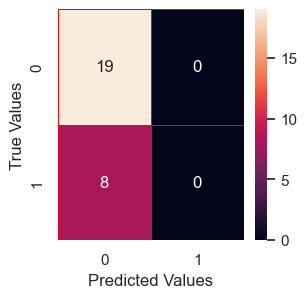

In [101]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Text(0, 0.5, 'score')

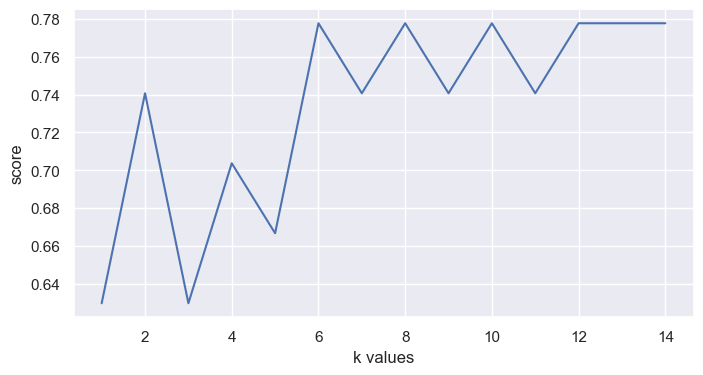

In [102]:
from sklearn.neighbors import KNeighborsClassifier

score_list=[]
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("score")

Score for Number of Neighbors = 6: 0.7777777777777778


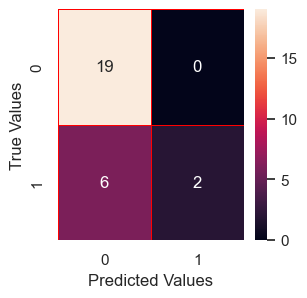

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 6: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

SVM Classification Score is: 0.7037037037037037


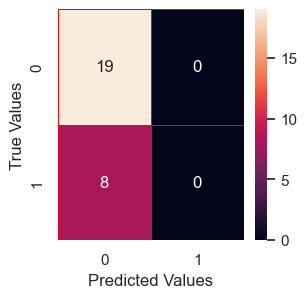

In [104]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(x_test,y_test))

#Confusion Matrix
y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Naive Bayes Classification Score: 0.5555555555555556


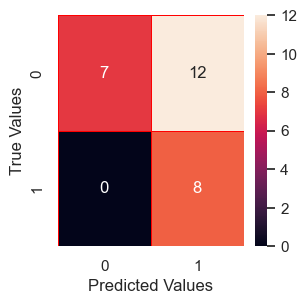

In [105]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_test,y_test)
print("Naive Bayes Classification Score: {}".format(naive_bayes.score(x_test,y_test)))
method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(x_test,y_test))

#Confusion Matrix
y_pred = naive_bayes.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Decision Tree Classification Score:  0.6296296296296297


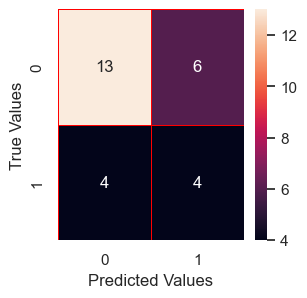

In [106]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test))
method_names.append("Decision Tree")
method_scores.append(dec_tree.score(x_test,y_test))

#Confusion Matrix
y_pred = dec_tree.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

XGBoost Classification Score:  0.7777777777777778


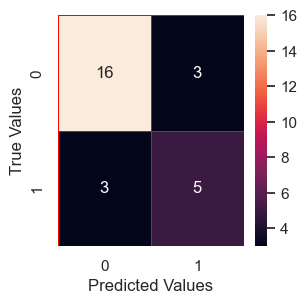

In [107]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(x_train,y_train)
print("XGBoost Classification Score: ",xgb_cl.score(x_test,y_test))
method_names.append("XGBoost")
method_scores.append(xgb_cl.score(x_test,y_test))

#Confusion Matrix
y_pred = xgb_cl.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Random Forest Score:  0.8518518518518519


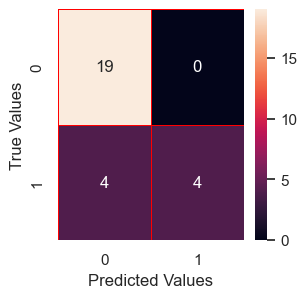

In [108]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(x_train,y_train)
print("Random Forest Score: ",classifier_rf.score(x_test,y_test))
method_names.append("Random Forest")
method_scores.append(classifier_rf.score(x_test,y_test))

#Confusion Matrix
y_pred = classifier_rf.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Text(0, 0.5, 'Method Score')

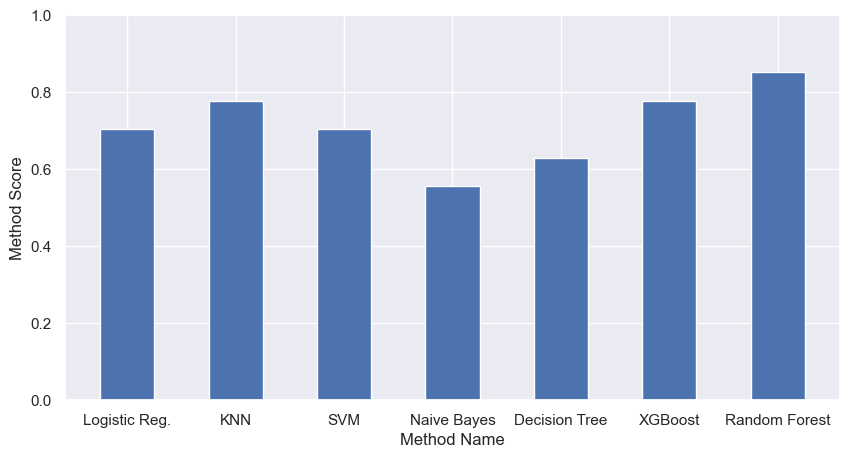

In [109]:
plt.figure(figsize=(10,5))
plt.ylim([0,1])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')

### Hence The random Forest is a better model to detect fraud flags for our given dataset. Having a accuracy of 85.18 %

 ### B) Best model to check if a customer is prone to 'type 1' fraud

In [110]:
df_fraud_type_1=df_fraud_type_flag
df_fraud_type_1=df_fraud_type_1.drop(columns=["customer_phone", "customer_device", "customer_ip_address", "customer_billing_address","fraud_flag", "fraud_score" ])
df_fraud_type_1=df_fraud_type_1.replace(['Not Fraud','type_2', 'type_1'],[0,0, 1])
df_fraud_type_1

,customer_email,transactions_count,orders_count,payments_count,fraud_type
1,evansjeffery@yahoo.com,3,3,7,1
2,andersonwilliam@yahoo.com,5,3,2,0
3,rubenjuarez@yahoo.com,3,3,1,0
4,uchen@malone.com,7,7,6,1
5,robinsoncynthia@dunn.com,1,1,2,1
...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,3,3,1,1
164,sbrown@hughes.biz,6,5,3,1
166,ethompson@jackson-sanders.com,8,6,6,1
167,dawn05@tucker-brown.com,7,5,4,0


In [111]:
df_fraud_type_1=df_fraud_type_1.set_index('customer_email')
df_fraud_type_train=df_features.merge(df_fraud_type_1, on='customer_email', how='inner')
df_fraud_type_train=df_fraud_type_train.set_index('customer_email')
df_fraud_type_train

,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal,JCB 16 digit,American Express,VISA 16 digit,Discover,...,JCB 15 digit,transaction_failed_0,transaction_failed_1,pending,fulfilled,failed,transactions_count,orders_count,payments_count,fraud_type
customer_email,,,,,,,,,,,,,,,,,,,,,
evansjeffery@yahoo.com,1.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,2.0,1.0,0.0,3.0,0.0,3,3,7,1
andersonwilliam@yahoo.com,0.0,5.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,...,0.0,3.0,2.0,0.0,4.0,1.0,5,3,2,0
rubenjuarez@yahoo.com,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,3.0,0.0,3,3,1,0
uchen@malone.com,0.0,7.0,4.0,0.0,3.0,0.0,3.0,1.0,2.0,0.0,...,0.0,5.0,2.0,0.0,6.0,1.0,7,7,6,1
robinsoncynthia@dunn.com,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
patrickcalderon@russo.net,0.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,...,0.0,2.0,1.0,0.0,3.0,0.0,3,2,1,0
mitchellvickie@brewer-jones.com,0.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,2.0,1.0,3,3,1,1
sbrown@hughes.biz,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,1.0,0.0,6.0,0.0,6,5,3,1


In [112]:

x=df_fraud_type_train.drop(columns=['fraud_type'])
y=df_fraud_type_train.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
#test_size=0.2 means %20 test datas, %80 train datas
method_names = []
method_scores = []
#These are for barplot in conclusion

Logistic Regression Classification Test Accuracy 0.5555555555555556


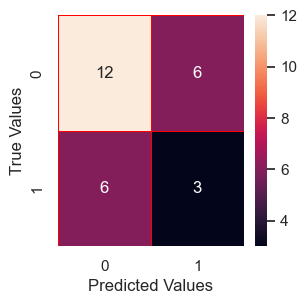

In [113]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Text(0, 0.5, 'score')

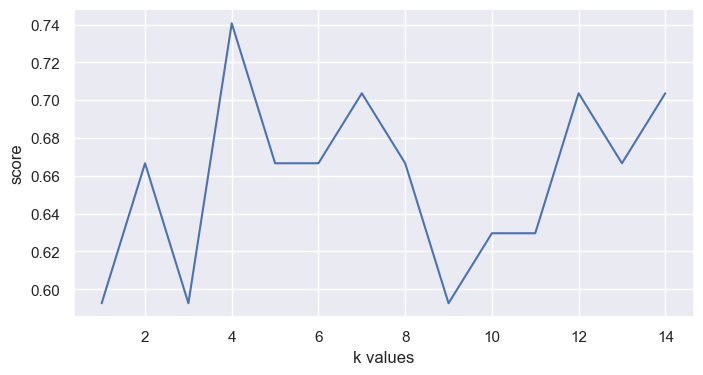

In [114]:
score_list=[]
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("score")

Score for Number of Neighbors = 4: 0.7407407407407407


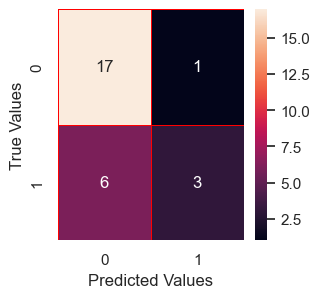

In [115]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 4: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

SVM Classification Score is: 0.7037037037037037


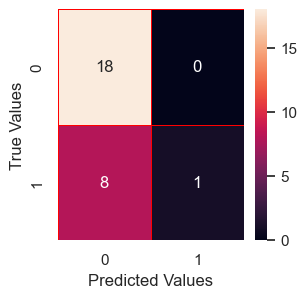

In [116]:
svm = SVC(random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(x_test,y_test))

#Confusion Matrix
y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Naive Bayes Classification Score: 0.7037037037037037


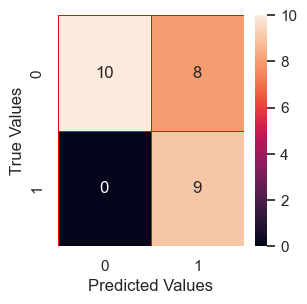

In [117]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_test,y_test)
print("Naive Bayes Classification Score: {}".format(naive_bayes.score(x_test,y_test)))
method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(x_test,y_test))

#Confusion Matrix
y_pred = naive_bayes.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Decision Tree Classification Score:  0.6296296296296297


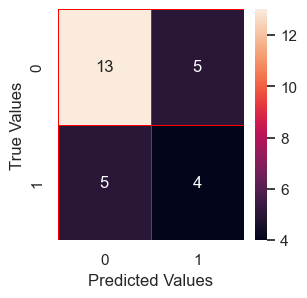

In [118]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test))
method_names.append("Decision Tree")
method_scores.append(dec_tree.score(x_test,y_test))

#Confusion Matrix
y_pred = dec_tree.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

XGBoost Classification Score:  0.6296296296296297


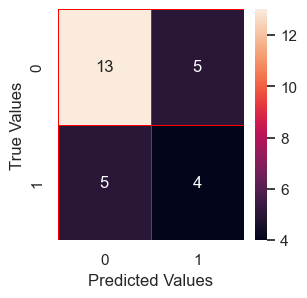

In [119]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(x_train,y_train)
print("XGBoost Classification Score: ",xgb_cl.score(x_test,y_test))
method_names.append("XGBoost")
method_scores.append(xgb_cl.score(x_test,y_test))

#Confusion Matrix
y_pred = xgb_cl.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Random Forest Score:  0.7037037037037037


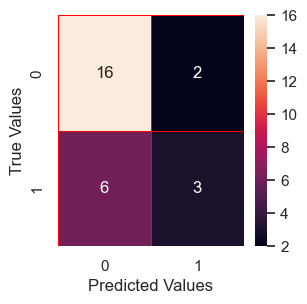

In [120]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(x_train,y_train)
print("Random Forest Score: ",classifier_rf.score(x_test,y_test))
method_names.append("Random Forest")
method_scores.append(classifier_rf.score(x_test,y_test))

#Confusion Matrix
y_pred = classifier_rf.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Text(0, 0.5, 'Method Score')

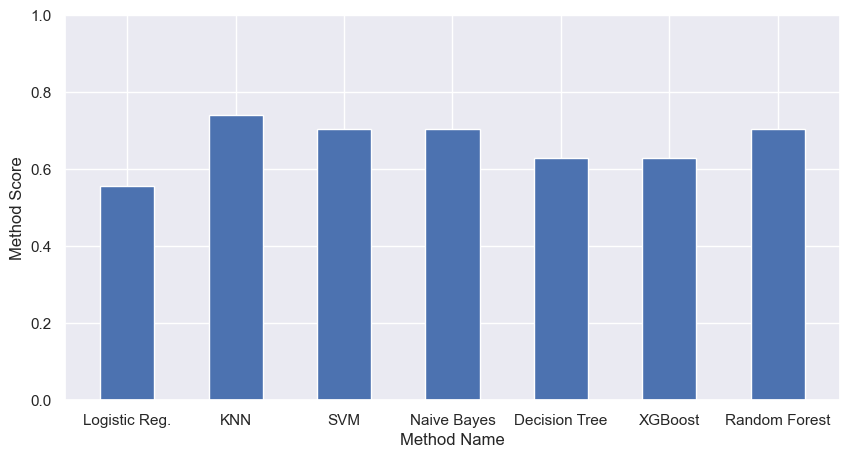

In [121]:
plt.figure(figsize=(10,5))
plt.ylim([0,1])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')

### Checking we can say that KNN performs best for detecting Type 1 Fraud customer.

 ## 6) Best model to check if a customer is prone to 'type 2' fraud

In [122]:
df_fraud_type_2=df_fraud_type_flag
df_fraud_type_2=df_fraud_type_2.drop(columns=["customer_phone", "customer_device", "customer_ip_address", "customer_billing_address","fraud_flag", "fraud_score" ])
df_fraud_type_2=df_fraud_type_2.replace(['Not Fraud','type_2', 'type_1'],[0,1, 0])
df_fraud_type_2

,customer_email,transactions_count,orders_count,payments_count,fraud_type
1,evansjeffery@yahoo.com,3,3,7,0
2,andersonwilliam@yahoo.com,5,3,2,0
3,rubenjuarez@yahoo.com,3,3,1,0
4,uchen@malone.com,7,7,6,0
5,robinsoncynthia@dunn.com,1,1,2,0
...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,3,3,1,0
164,sbrown@hughes.biz,6,5,3,0
166,ethompson@jackson-sanders.com,8,6,6,0
167,dawn05@tucker-brown.com,7,5,4,0


In [123]:
df_fraud_type_2=df_fraud_type_2.set_index('customer_email')
df_fraud_type_train_2=df_features.merge(df_fraud_type_2, on='customer_email', how='inner')
df_fraud_type_train_2=df_fraud_type_train_2.set_index('customer_email')
df_fraud_type_train_2

,payment_method_registration_failure_1,payment_method_registration_failure_0,card,bitcoin,apple pay,paypal,JCB 16 digit,American Express,VISA 16 digit,Discover,...,JCB 15 digit,transaction_failed_0,transaction_failed_1,pending,fulfilled,failed,transactions_count,orders_count,payments_count,fraud_type
customer_email,,,,,,,,,,,,,,,,,,,,,
evansjeffery@yahoo.com,1.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,2.0,1.0,0.0,3.0,0.0,3,3,7,0
andersonwilliam@yahoo.com,0.0,5.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,...,0.0,3.0,2.0,0.0,4.0,1.0,5,3,2,0
rubenjuarez@yahoo.com,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,3.0,0.0,3,3,1,0
uchen@malone.com,0.0,7.0,4.0,0.0,3.0,0.0,3.0,1.0,2.0,0.0,...,0.0,5.0,2.0,0.0,6.0,1.0,7,7,6,0
robinsoncynthia@dunn.com,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
patrickcalderon@russo.net,0.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,...,0.0,2.0,1.0,0.0,3.0,0.0,3,2,1,0
mitchellvickie@brewer-jones.com,0.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,2.0,1.0,3,3,1,0
sbrown@hughes.biz,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,1.0,0.0,6.0,0.0,6,5,3,0


In [124]:
x=df_fraud_type_train_2.drop(columns=['fraud_type'])
y=df_fraud_type_train_2.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
#test_size=0.2 means %20 test datas, %80 train datas
method_names = []
method_scores = []
#These are for barplot in conclusion

Logistic Regression Classification Test Accuracy 0.9629629629629629


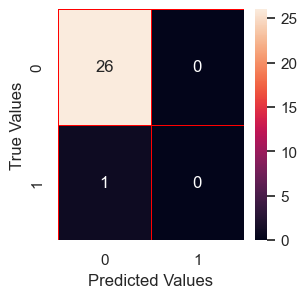

In [125]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Text(0, 0.5, 'score')

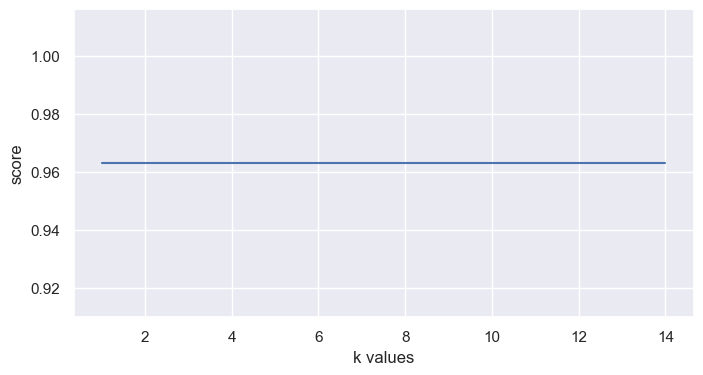

In [126]:
score_list=[]
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("score")

Score for Number of Neighbors = 2: 0.9629629629629629


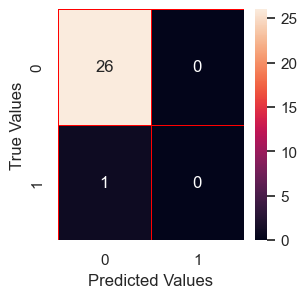

In [127]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 2: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

SVM Classification Score is: 0.9629629629629629


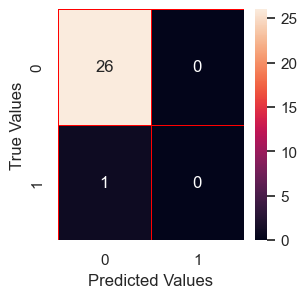

In [128]:
svm = SVC(random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(x_test,y_test))

#Confusion Matrix
y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Naive Bayes Classification Score: 1.0


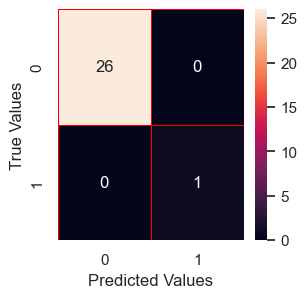

In [129]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_test,y_test)
print("Naive Bayes Classification Score: {}".format(naive_bayes.score(x_test,y_test)))
method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(x_test,y_test))

#Confusion Matrix
y_pred = naive_bayes.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Decision Tree Classification Score:  0.9629629629629629


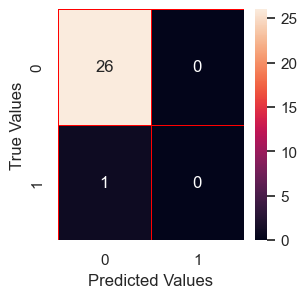

In [130]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test))
method_names.append("Decision Tree")
method_scores.append(dec_tree.score(x_test,y_test))

#Confusion Matrix
y_pred = dec_tree.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

XGBoost Classification Score:  0.9629629629629629


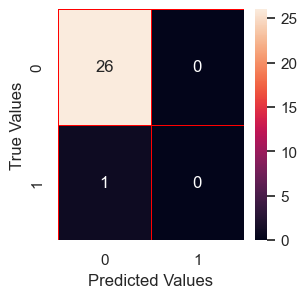

In [131]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(x_train,y_train)
print("XGBoost Classification Score: ",xgb_cl.score(x_test,y_test))
method_names.append("XGBoost")
method_scores.append(xgb_cl.score(x_test,y_test))

#Confusion Matrix
y_pred = xgb_cl.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Random Forest Score:  0.9629629629629629


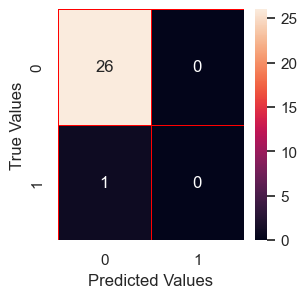

In [132]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(x_train,y_train)
print("Random Forest Score: ",classifier_rf.score(x_test,y_test))
method_names.append("Random Forest")
method_scores.append(classifier_rf.score(x_test,y_test))

#Confusion Matrix
y_pred = classifier_rf.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Text(0, 0.5, 'Method Score')

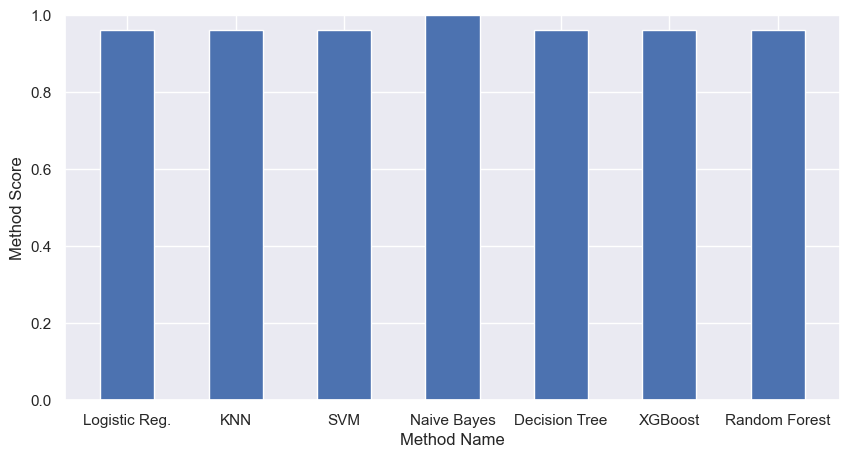

In [133]:
plt.figure(figsize=(10,5))
plt.ylim([0,1])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')

### For detecting Type 2 fraud we can use any model. We, will stick Naive Bayes for current feature set.

### Checking for more meaningfull features

### Ip address is explored lastly as most of this customer can have generated fake ip address but still the data can be explored.

### Exploring ip address as a feature

In [134]:
! pip install ip2geotools

In [135]:
! pip install geopy

In [136]:
import socket
import requests
from ip2geotools.databases.noncommercial import DbIpCity
from geopy.distance import distance

In [137]:
def printDetails(ip):
    res = DbIpCity.get(ip, api_key="free")
    print(f"Location: {res.city}, {res.region}, {res.country}")

In [138]:
ip_add = '219.173.211.202' 
printDetails(ip_add)

Location: Minato-ku, Tokyo, JP


In [139]:
ip_address_list=list(df_fraud_type_flag['customer_ip_address'])
ip_address_list

['219.173.211.202',
 '67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0',
 '95de:8565:5a66:792c:26e0:6cfb:7d87:11af',
 '196.89.235.192',
 '43.166.163.164',
 '33.67.35.30',
 'c899:ff67:6864:4365:def3:3023:655f:5181',
 '231.91.253.19',
 '184.97.57.11',
 '4304:521a:e1c3:766b:21f3:ac3:4ab2:5a2',
 '98.229.160.246',
 '2efe:240f:cc33:306:8e47:b8d5:b466:f12a',
 '229.2.225.188',
 '166.148.66.158',
 '128.61.46.131',
 '61ba:a72b:5401:db1a:9833:d0da:254c:2369',
 '73.182.31.59',
 '81.13.103.118',
 '58.13.30.104',
 '162.48.39.230',
 '89e:31aa:e9e2:90ea:aa00:4a8c:805c:20ea',
 '61.219.235.129',
 '46.130.37.206',
 '9717:f390:29c6:8d60:aee7:a054:1b90:9493',
 '72.251.102.162',
 '1289:d2a9:c65d:8fc7:7be4:129b:d7b:cf7b',
 '846:e2b8:6318:5636:946d:ca83:8076:d098',
 '58.43.60.165',
 '3617:fa2b:f31e:5b72:59a8:cb1a:d090:edb9',
 '224.3.233.30',
 '2432:d9dc:c6ad:ef9c:c5df:b7bf:1b48:4444',
 '158.72.242.154',
 'aae7:6c39:b70:7025:d60d:bab3:6547:4adc',
 '107.82.81.240',
 '225.62.150.241',
 '45.203.99.249',
 'f793:509a:b82a:f

In [140]:
def get_Details(ip):
    res = DbIpCity.get(ip, api_key="free")
    a=res.city
    b=res.region
    c=res.country
    return a,b,c

In [141]:
get_Details('219.173.211.202')

('Minato-ku', 'Tokyo', 'JP')

In [142]:

ip_address=[]
city=[]
region=[]
country=[]

for i in ip_address_list:
    try:
        match= re.findall('[0-9]+\.[0-9]+\.[0-9]+\.[0-9]+', str(i))
        a,b,c=get_Details(match[0])
        ip_address.append(match[0])
        city.append(a)
        region.append(b)
        country.append(c)
    except:
        pass

In [143]:
dict_ip_address = {'customer_ip_address': ip_address, 'city': city, 'region': region, 'country':country}  
df_ip_address = pd.DataFrame(dict_ip_address) 

In [144]:
df_ip_address

,customer_ip_address,city,region,country
0,219.173.211.202,Minato-ku,Tokyo,JP
1,196.89.235.192,Rabat (Agdal),Rabat-Salé-Kénitra,MA
2,43.166.163.164,Haidian (Haidian Qu),Beijing,CN
3,33.67.35.30,Whitehall,Ohio,US
4,231.91.253.19,None,None,ZZ
...,...,...,...,...
73,181.90.104.120,Palermo,Buenos Aires F.D.,AR
74,16.166.2.0,Palo Alto,California,US
75,203.246.172.244,Naju-si,Jeollanam-do,KR
76,132.132.95.33,Sierra Vista (Fort Huachuca),Arizona,US


### Hence, we have the location of 74 customer . Now, we can match the address to our main table and check for more insight.

In [145]:
df_fraud_type_flag

,customer_email,customer_phone,customer_device,customer_ip_address,customer_billing_address,transactions_count,orders_count,payments_count,fraud_flag,fraud_type,fraud_score
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,type_1,37
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,Not Fraud,50
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,Not Fraud,87
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,type_1,4
5,robinsoncynthia@dunn.com,+65(5)8997489788,hbww39m1wenbq4ymjhsx,43.166.163.164,"65233 Hutchinson Mountains\nMartinezside, OR 7...",1,1,2,True,type_1,22
...,...,...,...,...,...,...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True,type_1,44
164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True,type_1,11
166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,True,type_1,49
167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,Not Fraud,91


In [148]:
df_fraud_type=df_fraud_type_flag.merge(df_ip_address, on='customer_ip_address', how='left')
df_fraud_type=df_fraud_type.fillna(0)
df_fraud_type

,customer_email,customer_phone,customer_device,customer_ip_address,customer_billing_address,transactions_count,orders_count,payments_count,fraud_flag,fraud_type,fraud_score,city,region,country
0,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,type_1,37,Minato-ku,Tokyo,JP
1,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,Not Fraud,50,0,0,0
2,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,Not Fraud,87,0,0,0
3,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,type_1,4,Rabat (Agdal),Rabat-Salé-Kénitra,MA
4,robinsoncynthia@dunn.com,+65(5)8997489788,hbww39m1wenbq4ymjhsx,43.166.163.164,"65233 Hutchinson Mountains\nMartinezside, OR 7...",1,1,2,True,type_1,22,Haidian (Haidian Qu),Beijing,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True,type_1,44,Palermo,Buenos Aires F.D.,AR
143,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True,type_1,11,Palo Alto,California,US
144,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,True,type_1,49,Naju-si,Jeollanam-do,KR
145,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,Not Fraud,91,Sierra Vista (Fort Huachuca),Arizona,US


In [150]:
df_fraud_loc=df_fraud_type[df_fraud_type.fraud_flag==True]
df_fraud_loc

,customer_email,customer_phone,customer_device,customer_ip_address,customer_billing_address,transactions_count,orders_count,payments_count,fraud_flag,fraud_type,fraud_score,city,region,country
0,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,type_1,37,Minato-ku,Tokyo,JP
3,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,type_1,4,Rabat (Agdal),Rabat-Salé-Kénitra,MA
4,robinsoncynthia@dunn.com,+65(5)8997489788,hbww39m1wenbq4ymjhsx,43.166.163.164,"65233 Hutchinson Mountains\nMartinezside, OR 7...",1,1,2,True,type_1,22,Haidian (Haidian Qu),Beijing,CN
5,samuel15@saunders-rhodes.com,5045239487,up7afvce5v0omniqlevq,33.67.35.30,"3960 Emily Fort\nStaceytown, AR 21817-3325",2,1,2,True,type_1,16,Whitehall,Ohio,US
7,bowenwilliam@yahoo.com,(128)248-4091x37789,qmntgod0numz62gzbla7,231.91.253.19,"27061 Wright Forks\nCraigland, MN 59915",6,5,1,True,type_1,28,0,0,ZZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,andre74@patrick-decker.com,150-073-8610,4gfo1e3xeirjanhwko92,d89c:db0:5ff9:a150:9e6c:482d:c900:fb33,"55197 Jeffrey Burgs Suite 700\nGardnerport, VA...",5,4,4,True,type_1,7,0,0,0
142,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True,type_1,44,Palermo,Buenos Aires F.D.,AR
143,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True,type_1,11,Palo Alto,California,US
144,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,True,type_1,49,Naju-si,Jeollanam-do,KR


<AxesSubplot:xlabel='country', ylabel='count'>

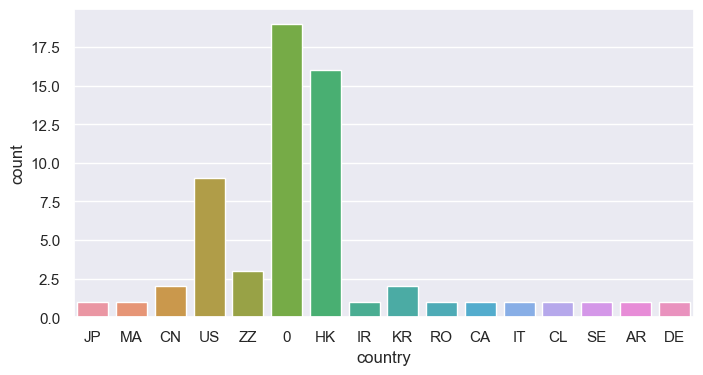

In [152]:
sns.set(rc={'figure.figsize':(8,4)})

sns.countplot(data=df_fraud_loc, x=df_fraud_loc['country'])

### Hence, an important insight can be that most of the fraud customer have their ip address  in HongKong. There, is a possibility that the ip address used can wrong all together. Neverthe less there is still a possibility to check customer from countries like HongKong, US, Canada
### Also, a lot of customer (22) have unknown Ip Address or non traceable. This should be checked further.

<AxesSubplot:xlabel='count', ylabel='region'>

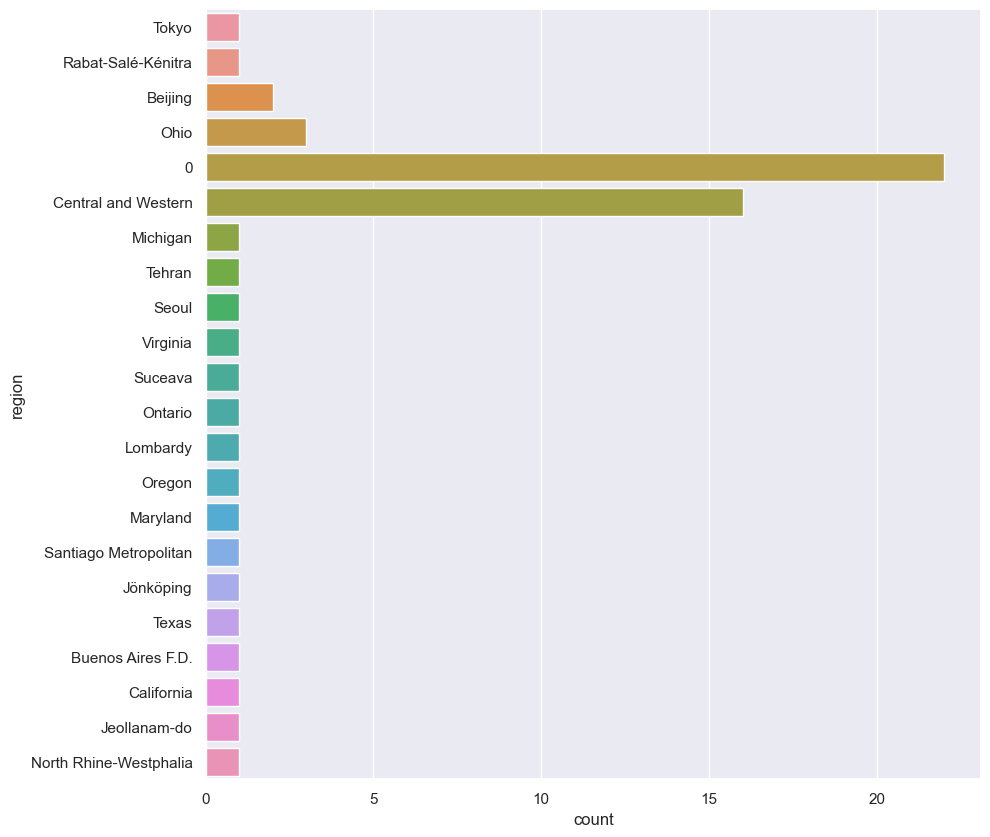

In [258]:
sns.set(rc={'figure.figsize':(10,10)})

sns.countplot(data=df_fraud_loc, y=df_fraud_loc['region'])

###  Central and Western region from Honkong have more fraud customer.

<AxesSubplot:xlabel='count', ylabel='city'>

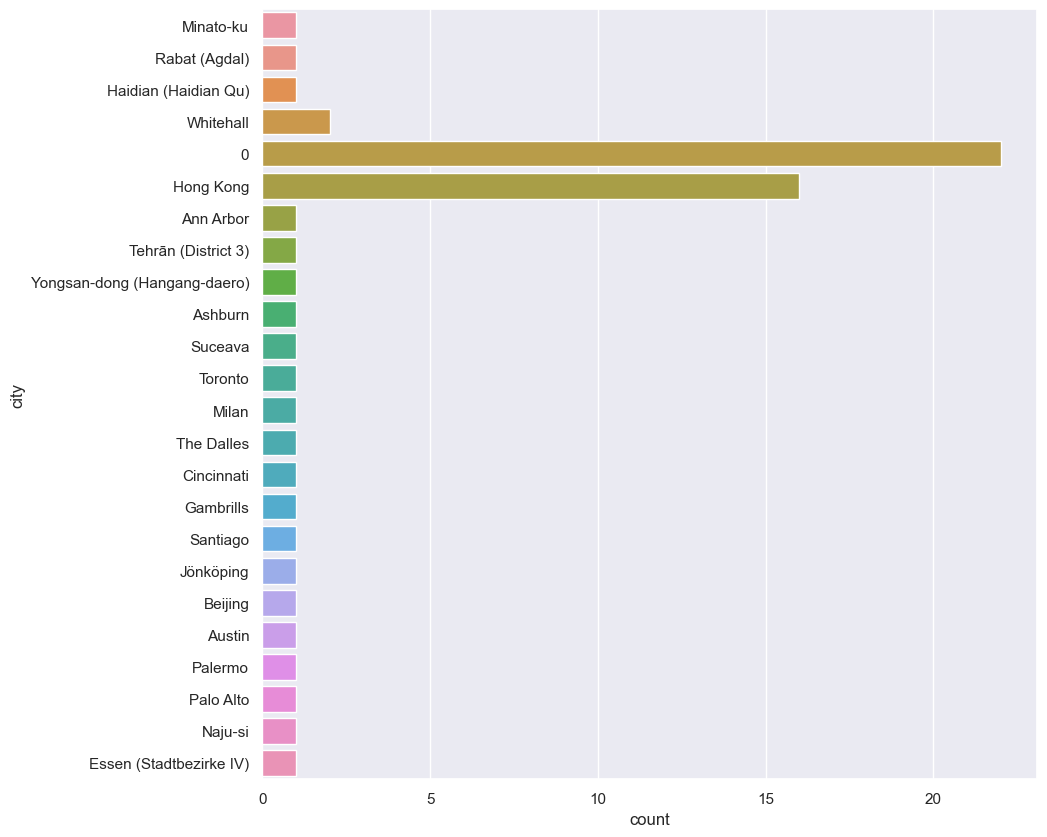

In [259]:
sns.set(rc={'figure.figsize':(10,10)})

sns.countplot(data=df_fraud_loc, y=df_fraud_loc['city'])

### For City Honkong has the most number of fraud customer.

### We can also use country as a feature in dataset.